Non-commercial Use License

Copyright (c) 2021 Siemens Technology

This software, along with associated documentation files (the "Software"), is 
provided for the sole purpose of providing Proof of Concept. Any commercial 
uses of the Software including, but not limited to, the rights to sublicense, 
and/or sell copies of the Software are prohibited and are subject to a 
separate licensing agreement with Siemens. This software may be proprietary 
to Siemens and may be covered by patent and copyright laws. Processes 
controlled by the Software are patent pending.

The above copyright notice and this permission notice shall remain attached 
to the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR 
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE 
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, 
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [1]:
import os, sys
THIS_DIR = os.path.abspath('')
PARENT_DIR = os.path.dirname(THIS_DIR)
sys.path.append(PARENT_DIR)

import json

import matplotlib.pyplot as plt
from PIL import Image, ImageSequence
from pytorch_lightning import seed_everything
import torch

from trainer import Model, str_to_class
from systems.bouncing_point_masses import BouncingPointMasses
from systems.bouncing_disks import BouncingDisks
from systems.chain_pendulum_with_contact import ChainPendulumWithContact
from systems.gyroscope_with_wall import GyroscopeWithWall
from systems.rope import Rope

seed_everything(0)
%matplotlib inline

os.makedirs(os.path.join(PARENT_DIR, "figures"), exist_ok=True)
FIG_DIR = os.path.join(PARENT_DIR, "figures")

In [2]:
# def str_to_class(classname):
#     return getattr(sys.modules[__name__], classname)
model_names = [
    "CLNNwC", 
    "CHNNwC", 
    "CLNNwC_reg", 
    "CHNNwC_reg", 
    "MLP_CD_CLNN", 
    "IN_CP_CLNN",
    "IN_CP_SP", 
]
system_names = [
    "_BP5-e",
    "_BP5",
    "_CP3-e",
    "_CP3",
    "_BD5",
    "Rope_default",
    "_Gyro-e",
    "_Gyro",
]
class_names = [
    "BouncingPointMasses",
    "BouncingPointMasses",
    "ChainPendulumWithContact",
    "ChainPendulumWithContact",
    "BouncingDisks",
    "Rope",
    "GyroscopeWithWall",
    "GyroscopeWithWall",
]

bodies = {}
for i in range(len(class_names)):
    with open(os.path.join(PARENT_DIR, "examples", system_names[i] +".json"), "r") as file:
        body_kwargs = json.load(file)
    bodies[system_names[i]] = str_to_class(class_names[i])(system_names[i], **body_kwargs)

In [3]:
results = {}
for system_name in system_names:
    results[system_name] = {}
    for model_name in model_names:
        print(f"calculating {system_name}, {model_name}")
        checkpoint_path = os.path.join(
            PARENT_DIR,
            "logs",
            f"{system_name}_{model_name}_N800",
            "version_0",
            "last.ckpt"
        )
        model = Model.load_from_checkpoint(checkpoint_path)
        # we'd like to calculate one trajectory
        model.hparams.batch_size = 1
        model.eval()
        dataloader = model.test_dataloader()
        test_batch = next(iter(dataloader))
        with torch.no_grad():
            results[system_name][model_name] = model.test_step(
                test_batch, 
                0, 
                50 * model.hparams.dt, # if system_name != "_Rope" else 10 * model.hparams.dt,
            )

calculating _BP5-e, CLNNwC
405 out of 800 trajectories contains collision.
50 out of 100 trajectories contains collision.
50 out of 100 trajectories contains collision.
calculating _BP5-e, CHNNwC
405 out of 800 trajectories contains collision.
50 out of 100 trajectories contains collision.
50 out of 100 trajectories contains collision.
calculating _BP5-e, CLNNwC_reg
405 out of 800 trajectories contains collision.
50 out of 100 trajectories contains collision.
50 out of 100 trajectories contains collision.
calculating _BP5-e, CHNNwC_reg
405 out of 800 trajectories contains collision.
50 out of 100 trajectories contains collision.
50 out of 100 trajectories contains collision.
calculating _BP5-e, MLP_CD_CLNN
405 out of 800 trajectories contains collision.
50 out of 100 trajectories contains collision.
50 out of 100 trajectories contains collision.
calculating _BP5-e, IN_CP_CLNN
405 out of 800 trajectories contains collision.
50 out of 100 trajectories contains collision.
50 out of 100 tr

/home/z0042y5x/.pyenv/versions/3.8.5/envs/ode/lib/python3.8/site-packages/diffcp/cone_program.py:282: UserWarning: Solved/Inaccurate.
  warnings.warn("Solved/Inaccurate.")


calculating Rope_default, CHNNwC
512 out of 800 trajectories contains collision.
65 out of 100 trajectories contains collision.
65 out of 100 trajectories contains collision.
calculating Rope_default, CLNNwC_reg
512 out of 800 trajectories contains collision.
65 out of 100 trajectories contains collision.
65 out of 100 trajectories contains collision.
calculating Rope_default, CHNNwC_reg
512 out of 800 trajectories contains collision.
65 out of 100 trajectories contains collision.
65 out of 100 trajectories contains collision.
calculating Rope_default, MLP_CD_CLNN
512 out of 800 trajectories contains collision.
65 out of 100 trajectories contains collision.
65 out of 100 trajectories contains collision.
calculating Rope_default, IN_CP_CLNN
512 out of 800 trajectories contains collision.
65 out of 100 trajectories contains collision.
65 out of 100 trajectories contains collision.
calculating Rope_default, IN_CP_SP
512 out of 800 trajectories contains collision.
65 out of 100 trajectorie

/home/z0042y5x/clnnwcontact/utils.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure()
/home/z0042y5x/clnnwcontact/systems/gyroscope_with_wall.py:280: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  self.cone[0] = self.ax.plot_surface(xx, yy, zz, color="orangered", zorder=4)
/home/z0042y5x/clnnwcontact/systems/gyroscope_with_wall.py:280: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  self.cone[0] = self.ax.plot_surface(xx, yy, zz, color="orangered", zorder=4)
/home/z0042y5x/clnnwcontact/systems/gyroscope_with_wall.py:280: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  self.cone[0] = self.ax.plot_surface(xx, yy, zz, color="orangered", zorder=4)
/home/z

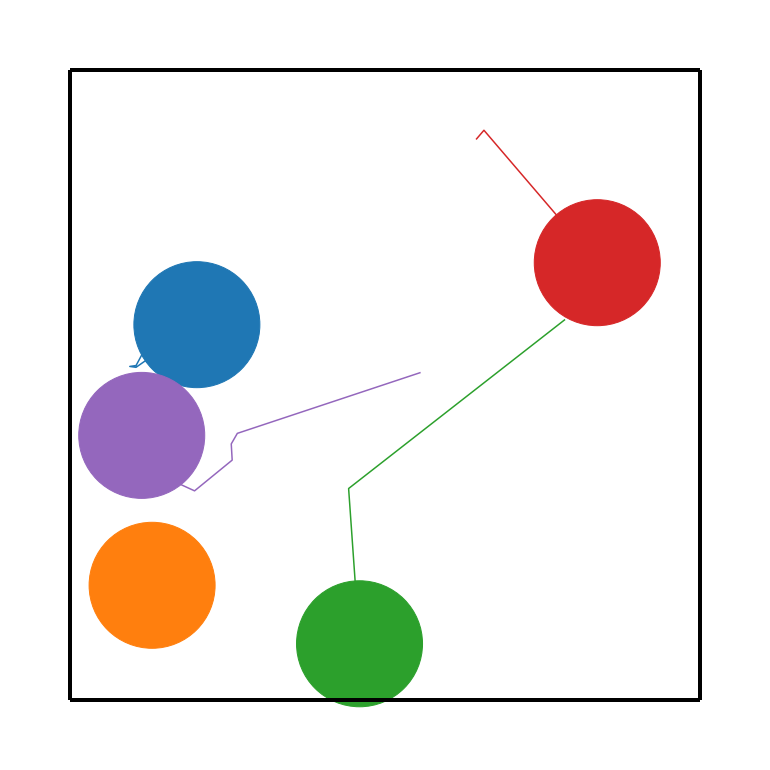

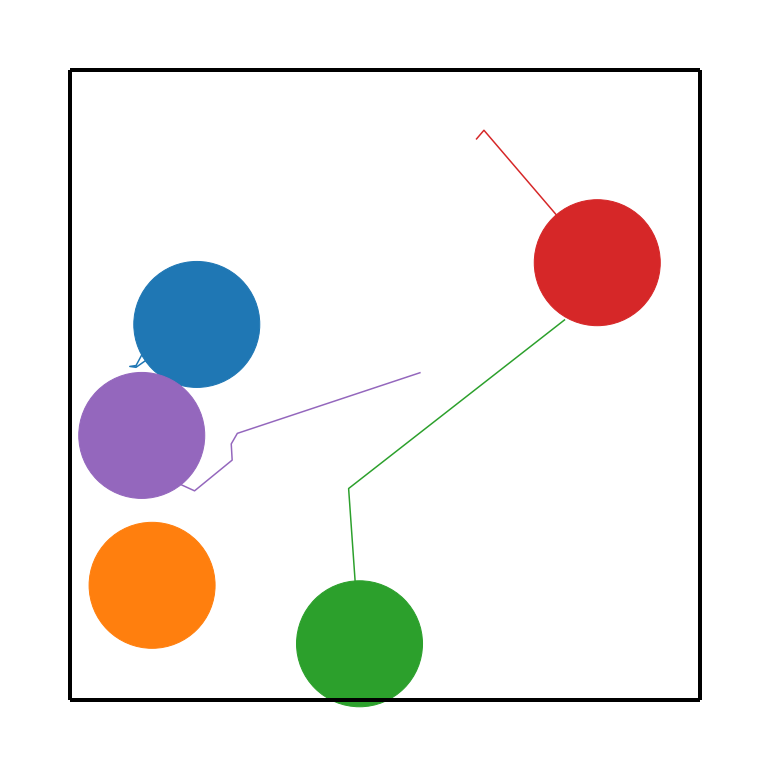

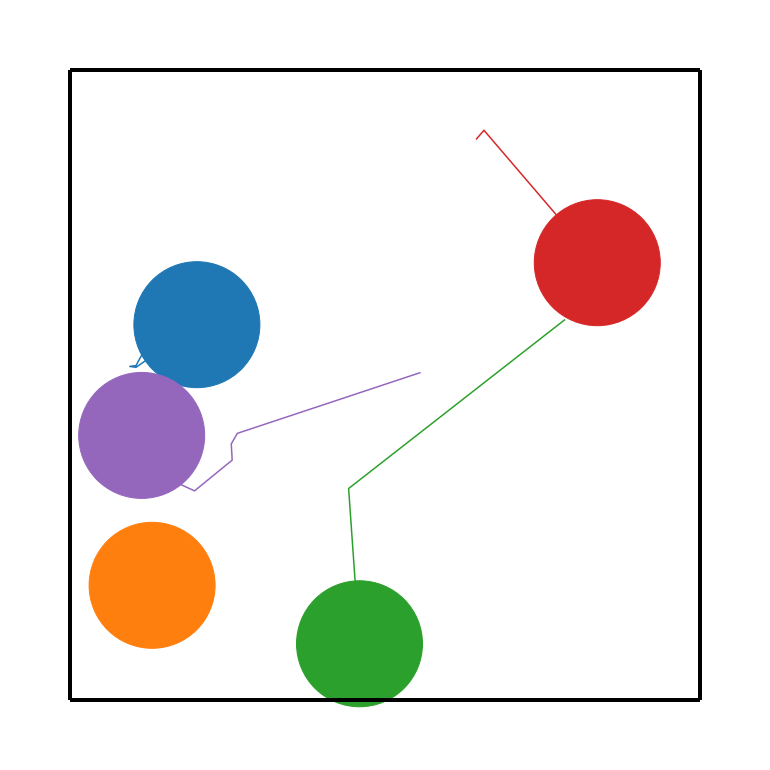

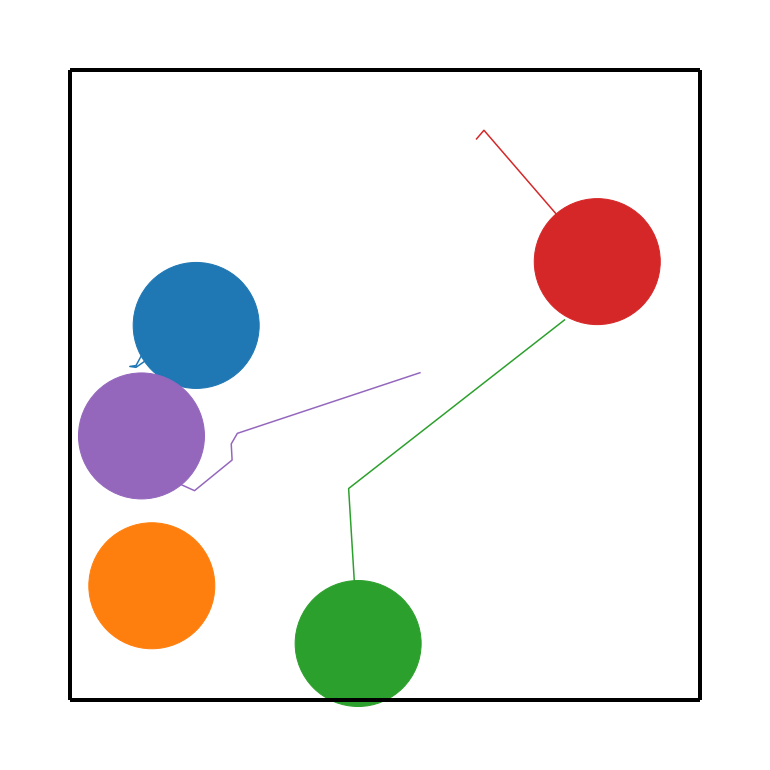

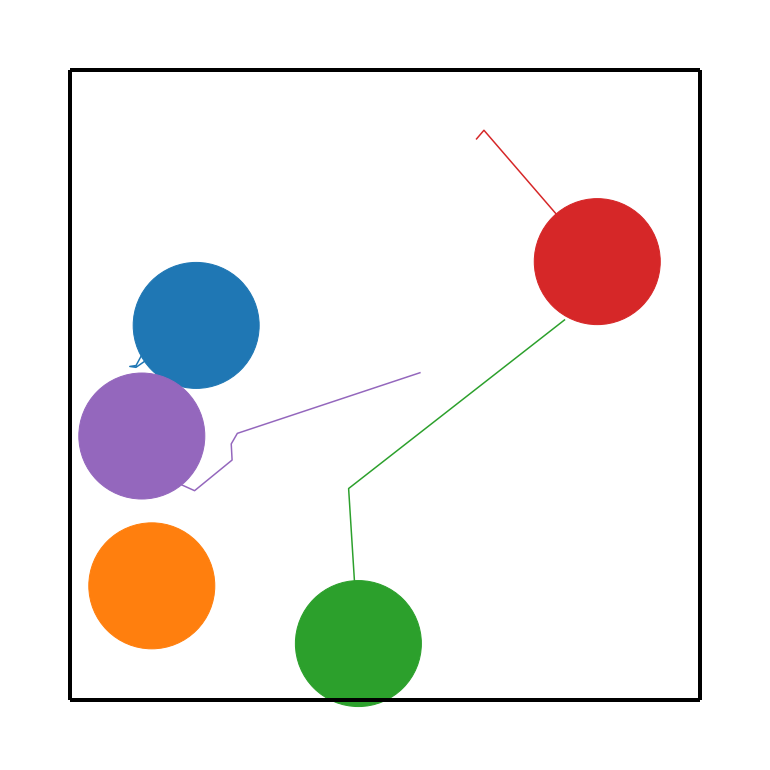

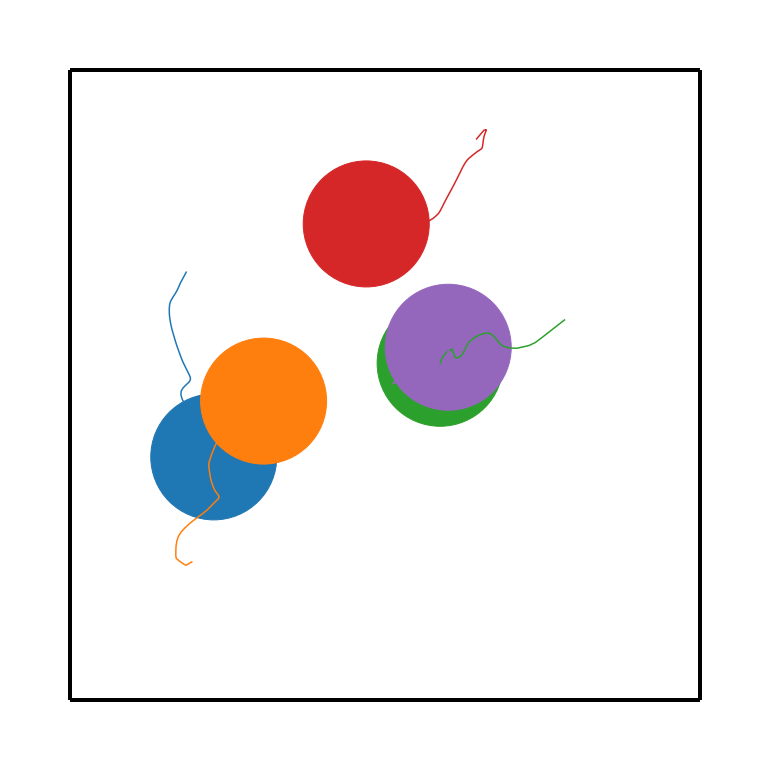

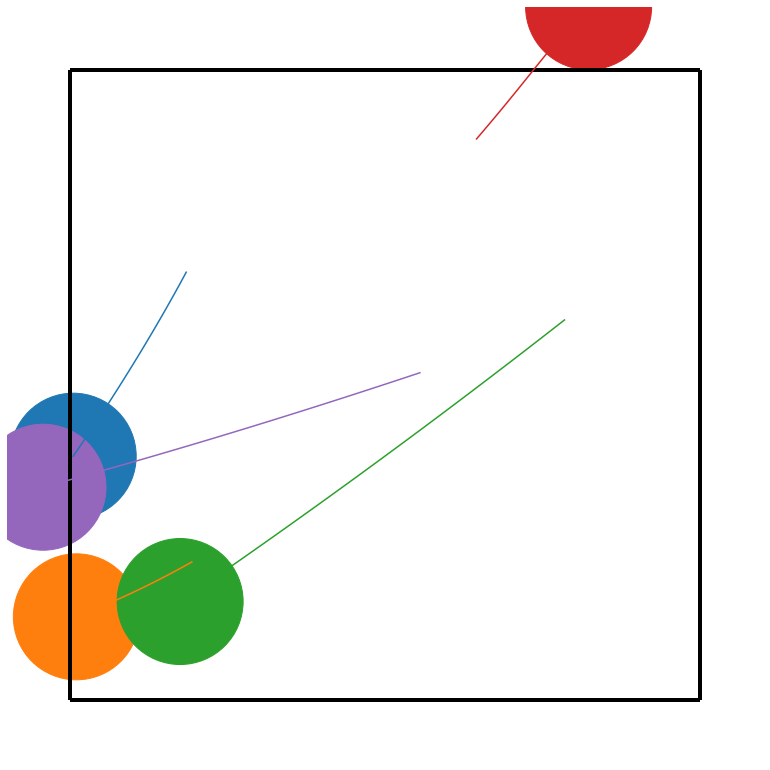

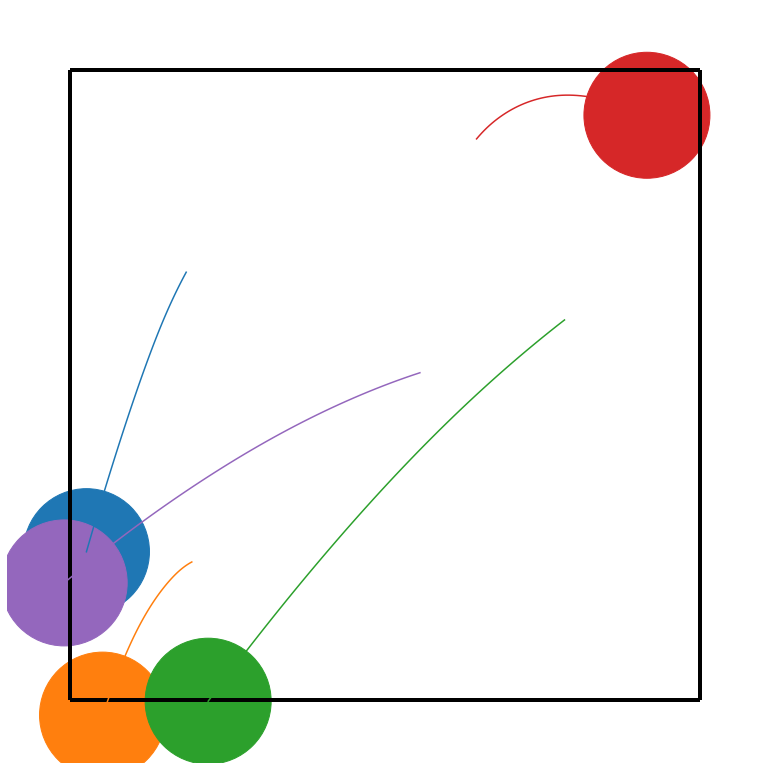

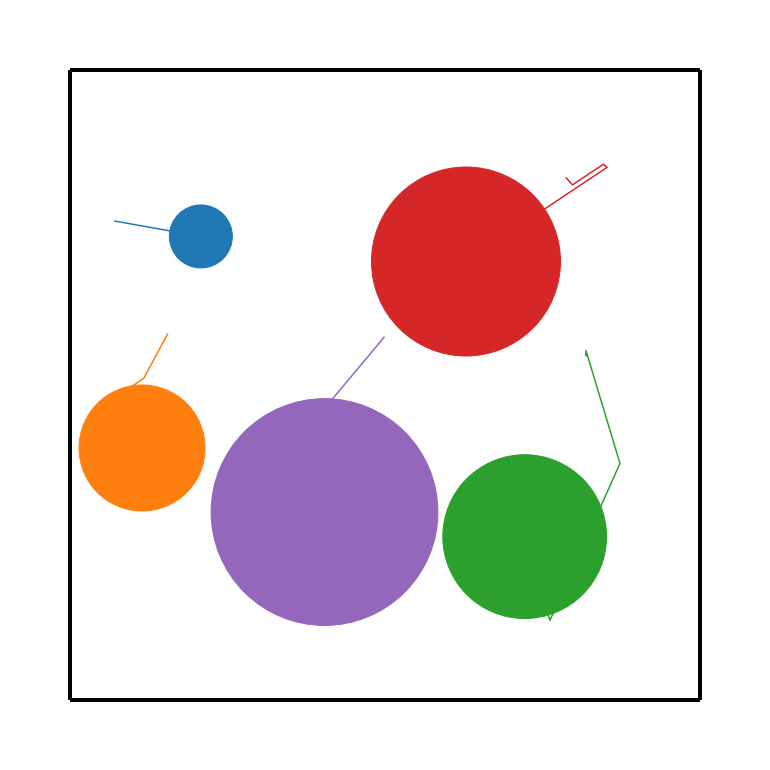

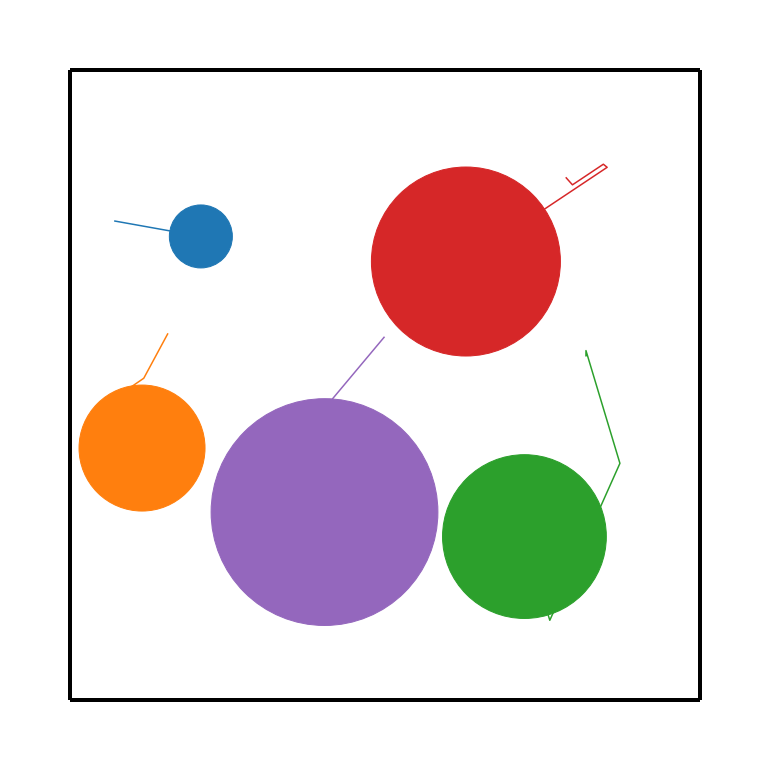

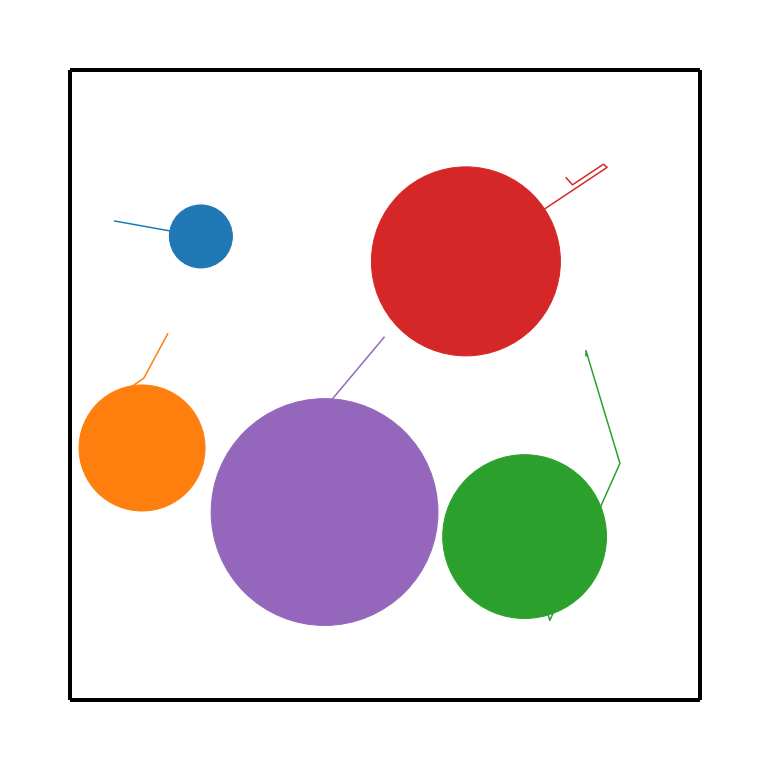

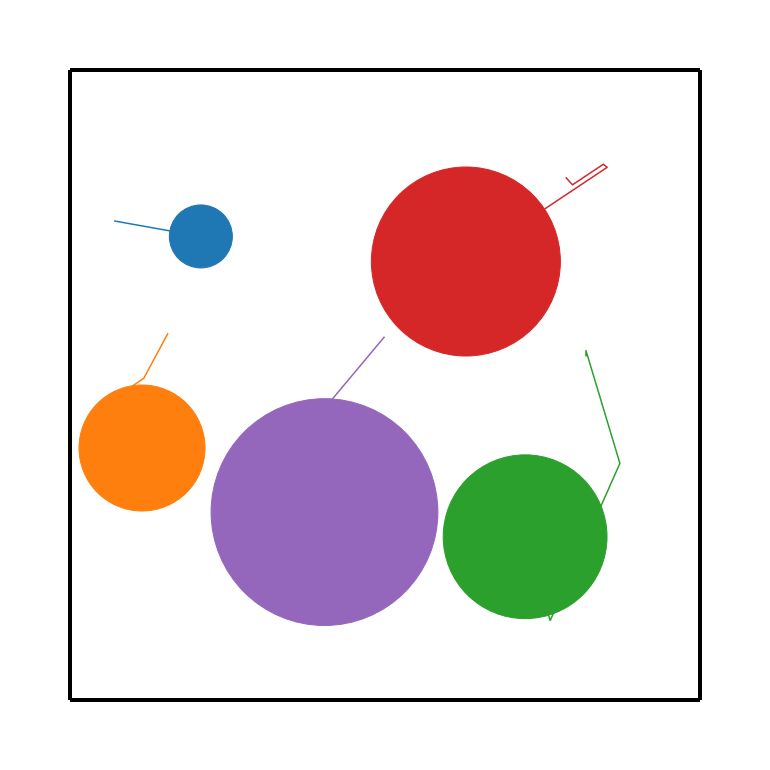

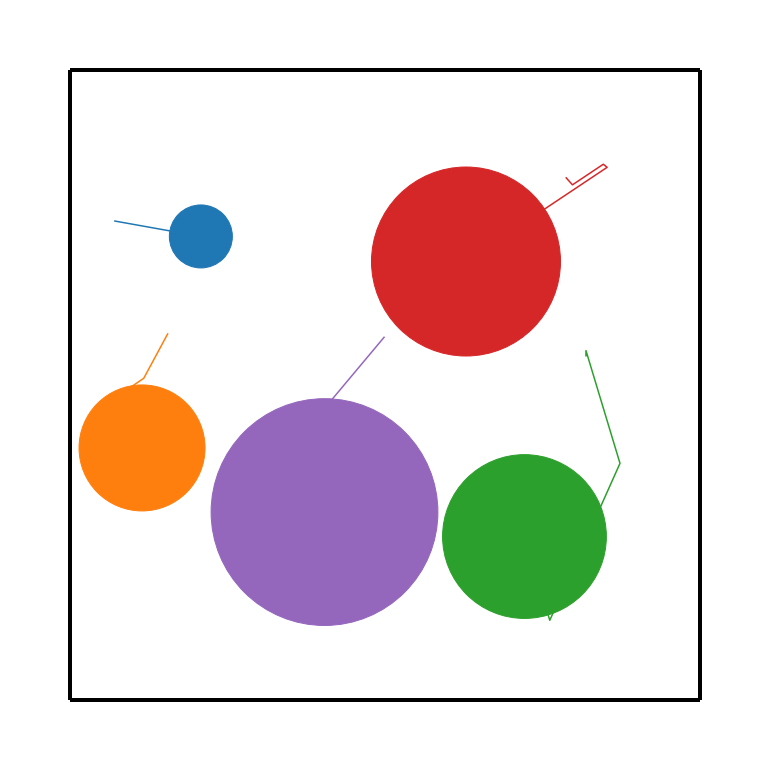

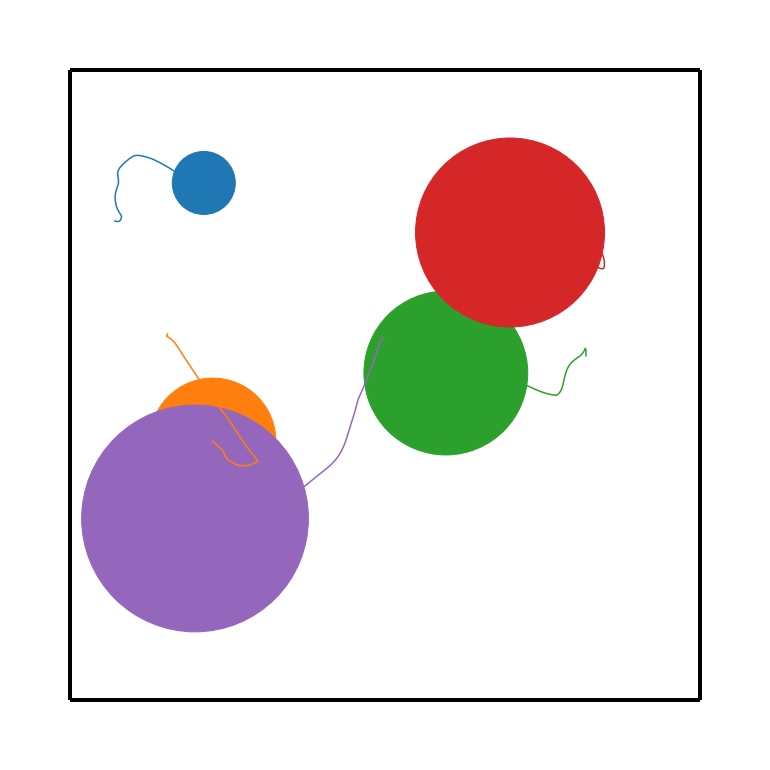

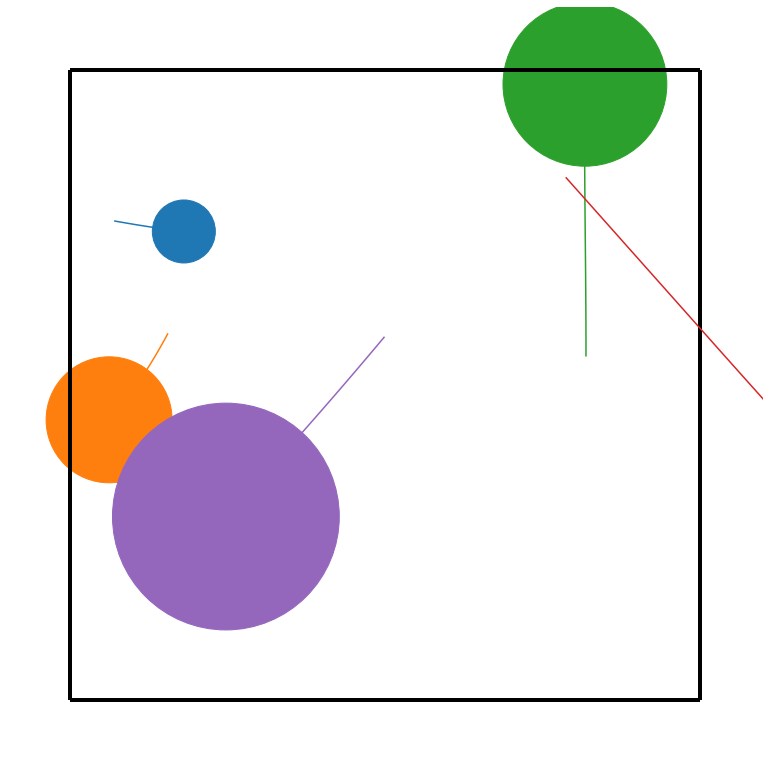

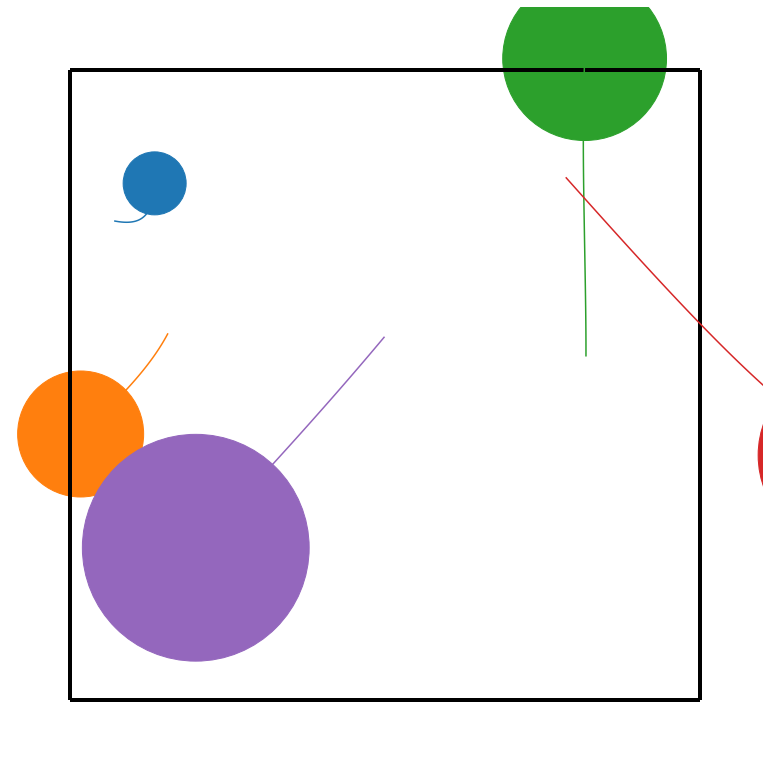

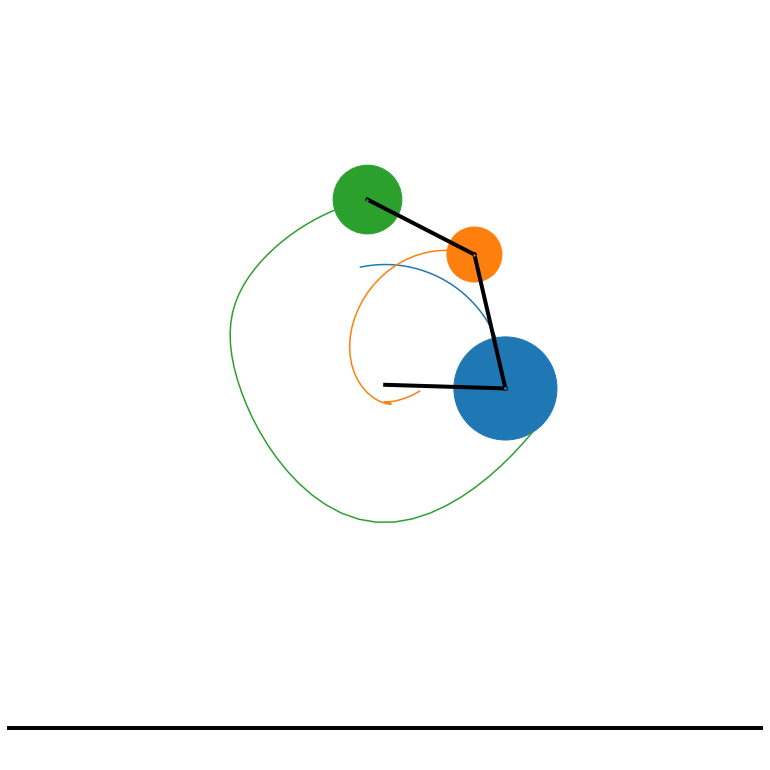

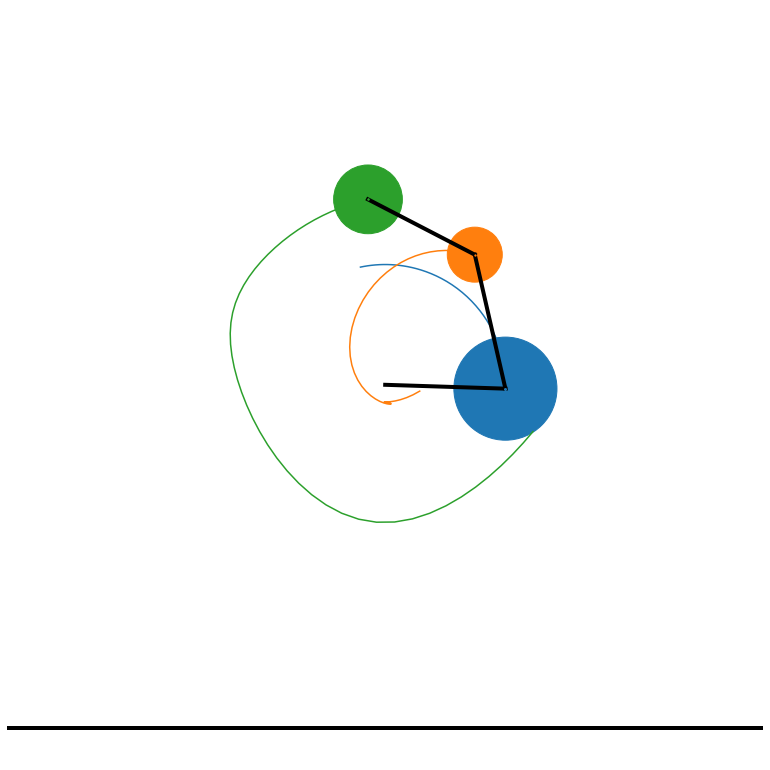

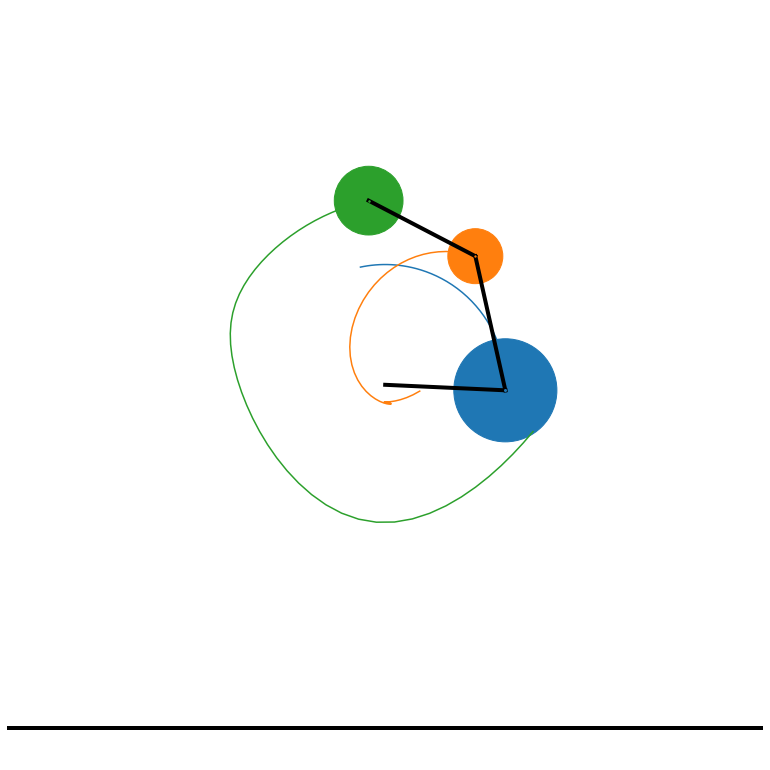

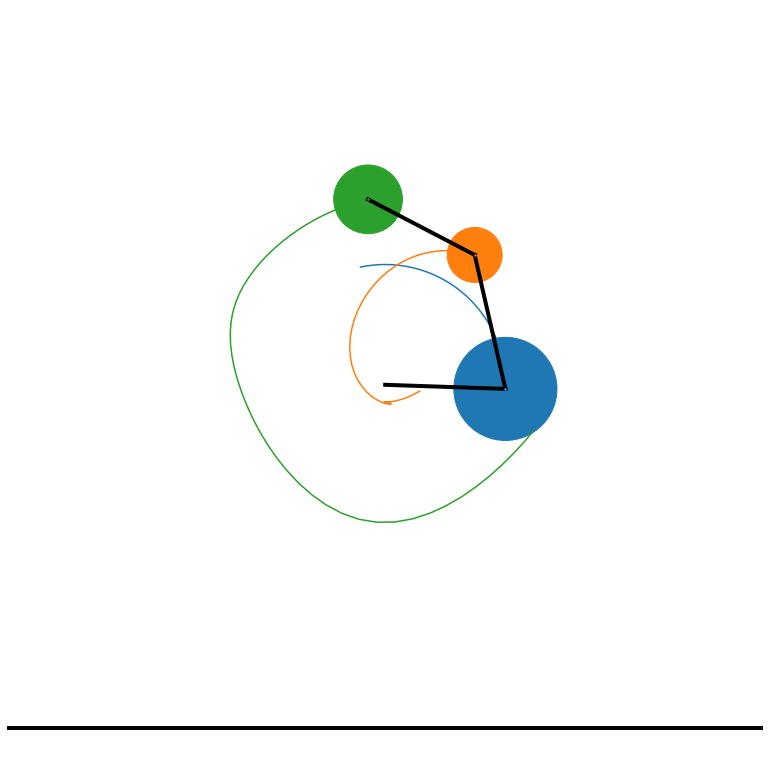

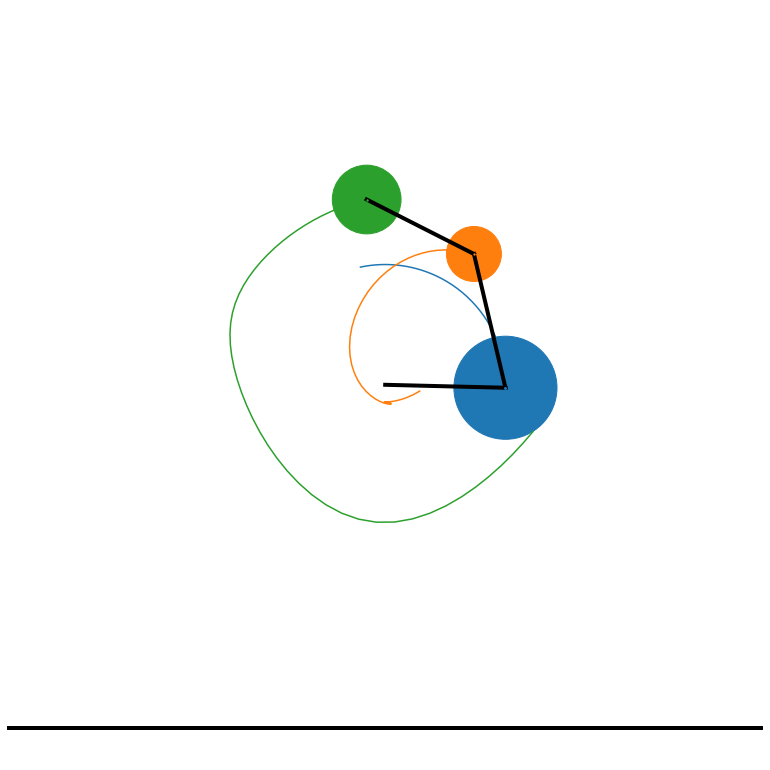

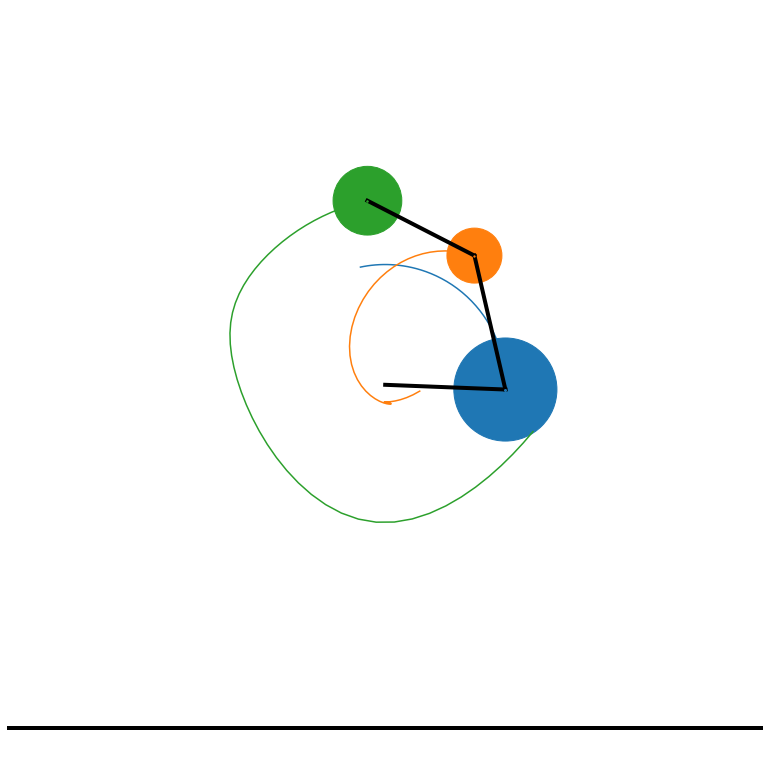

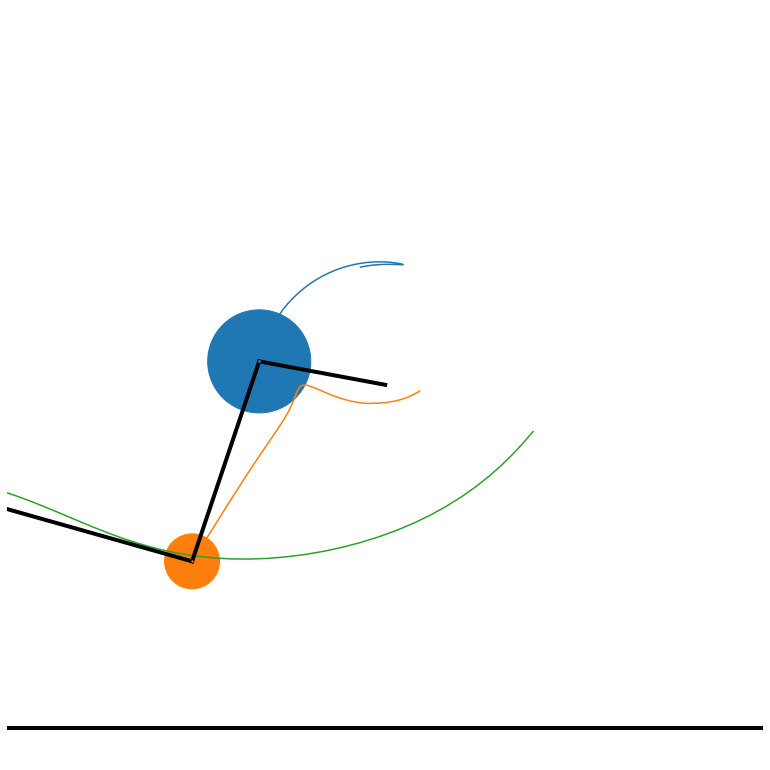

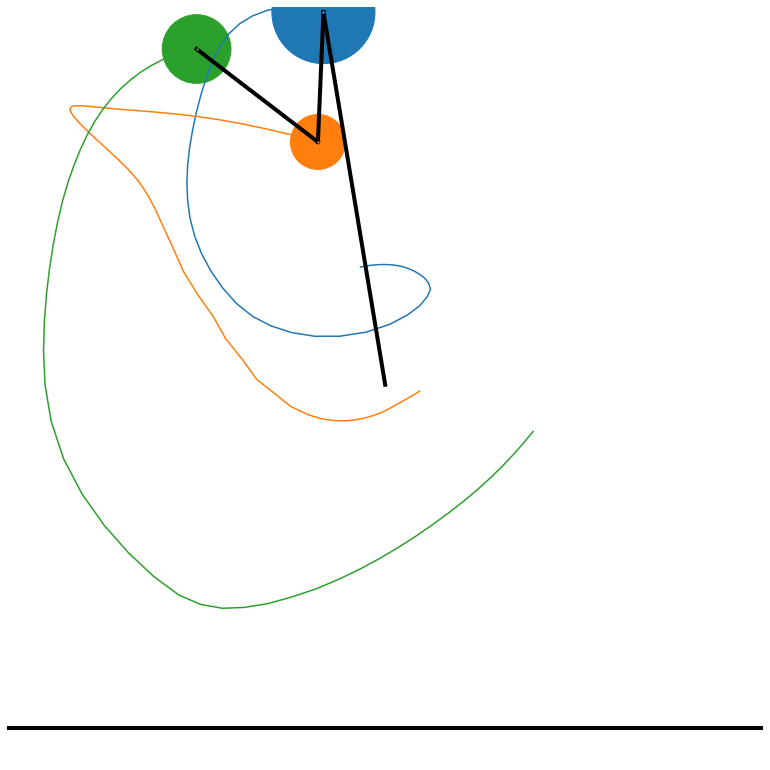

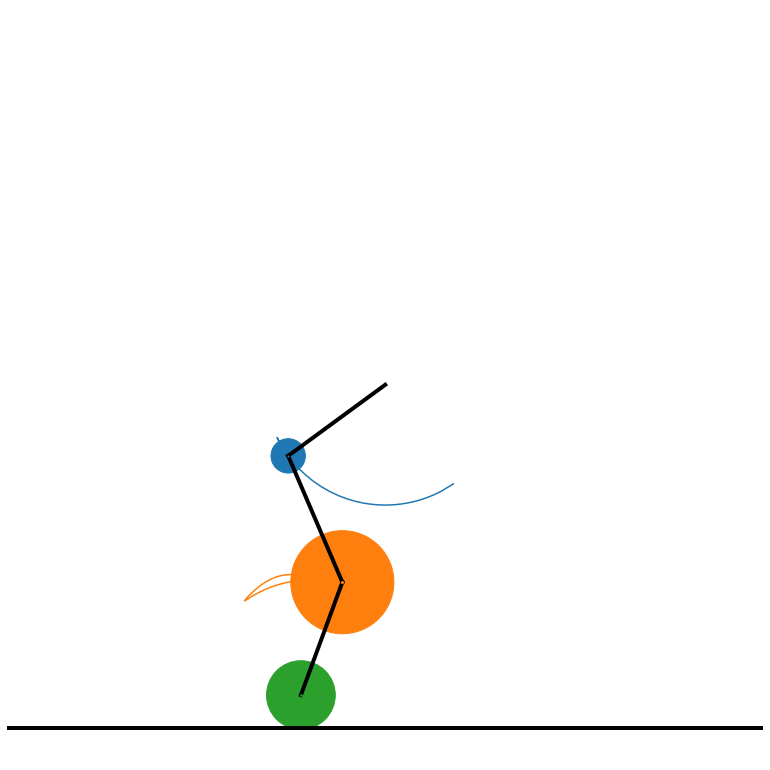

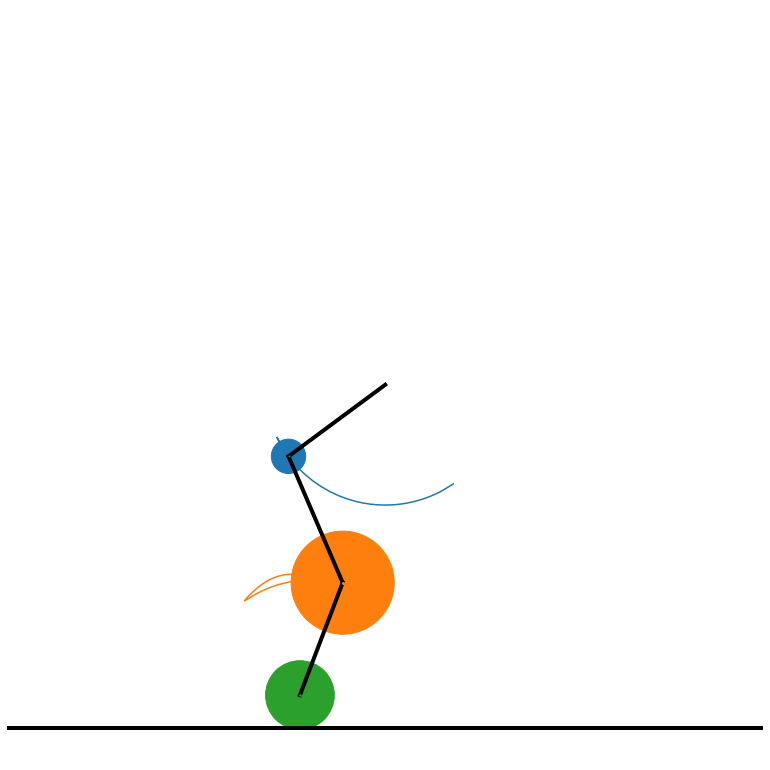

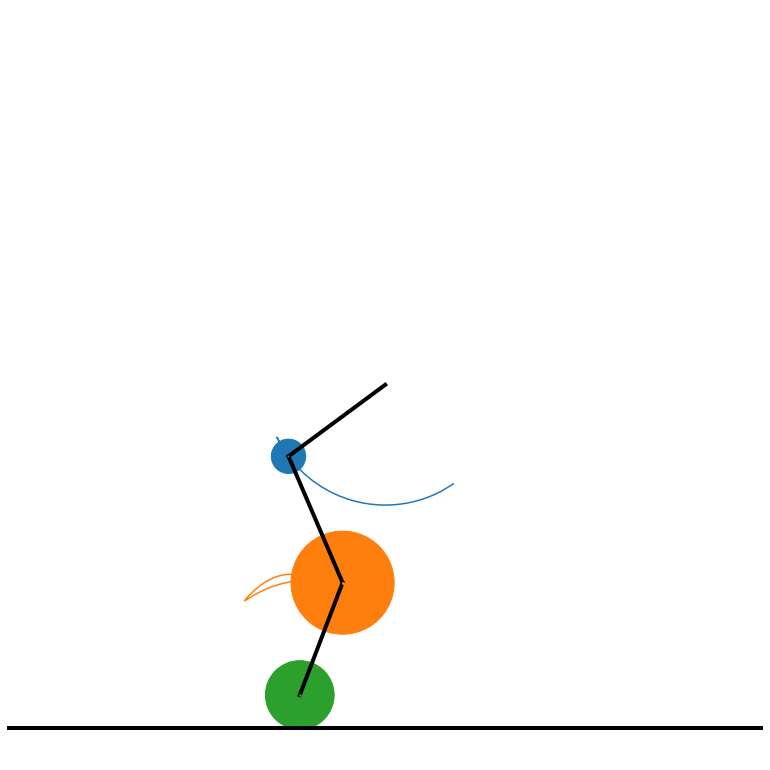

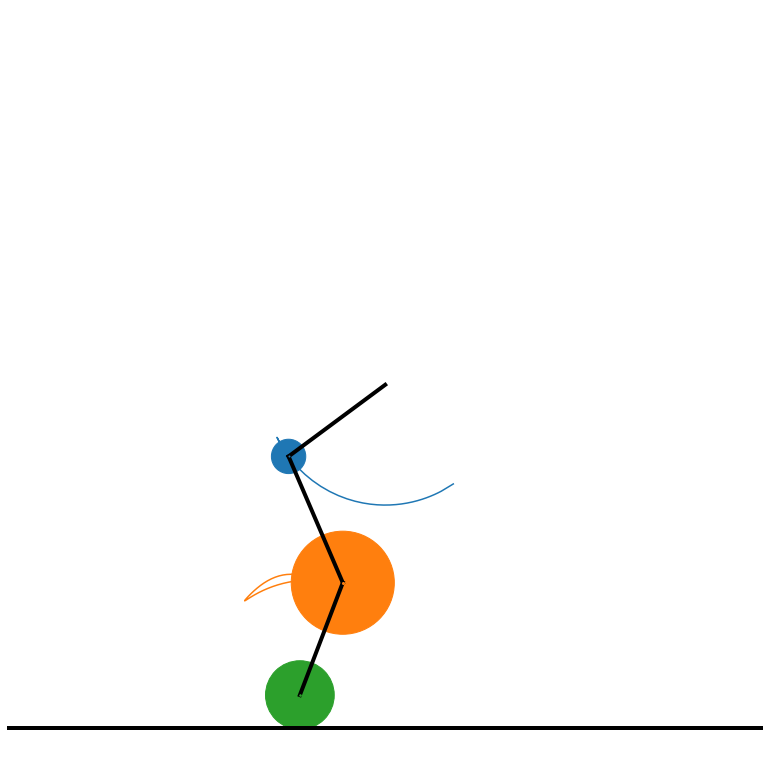

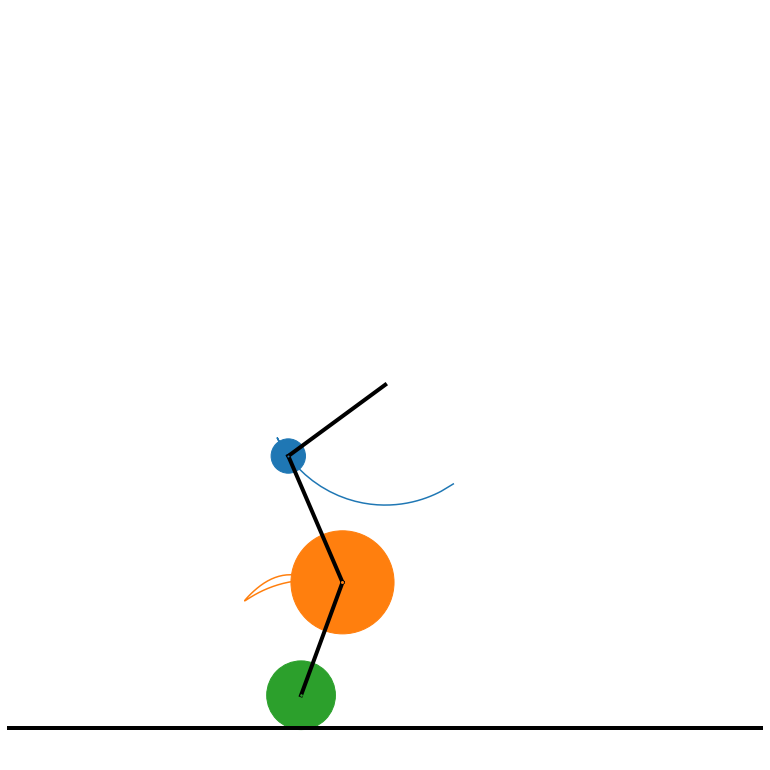

ValueError: need at least one array to concatenate

<Figure size 756x756 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 756x756 with 1 Axes>

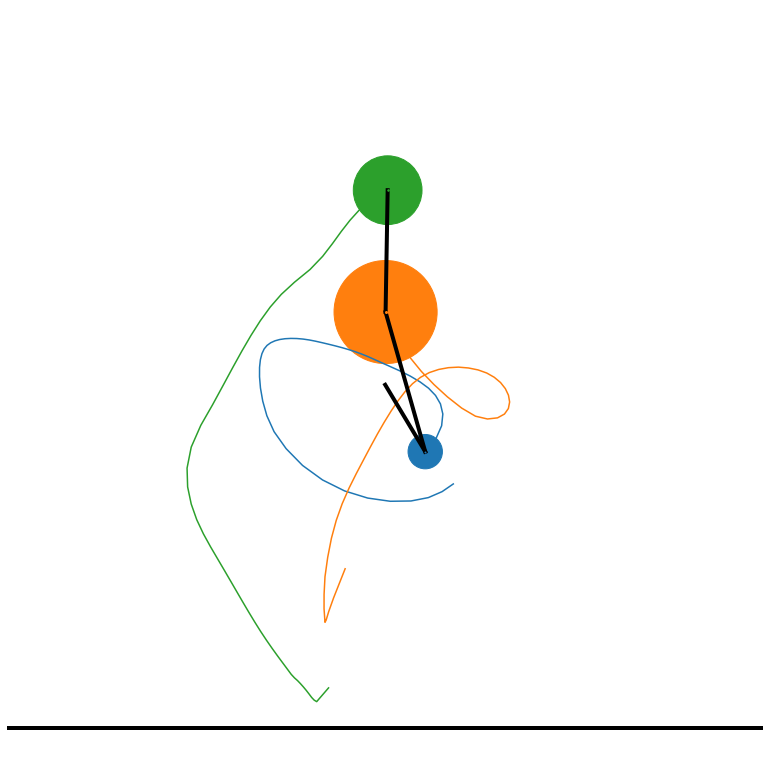

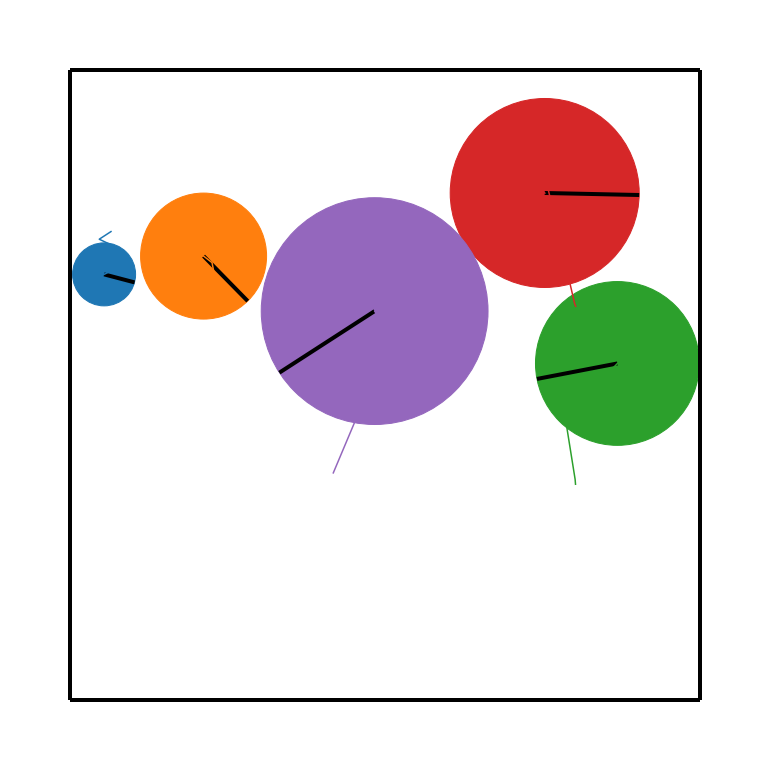

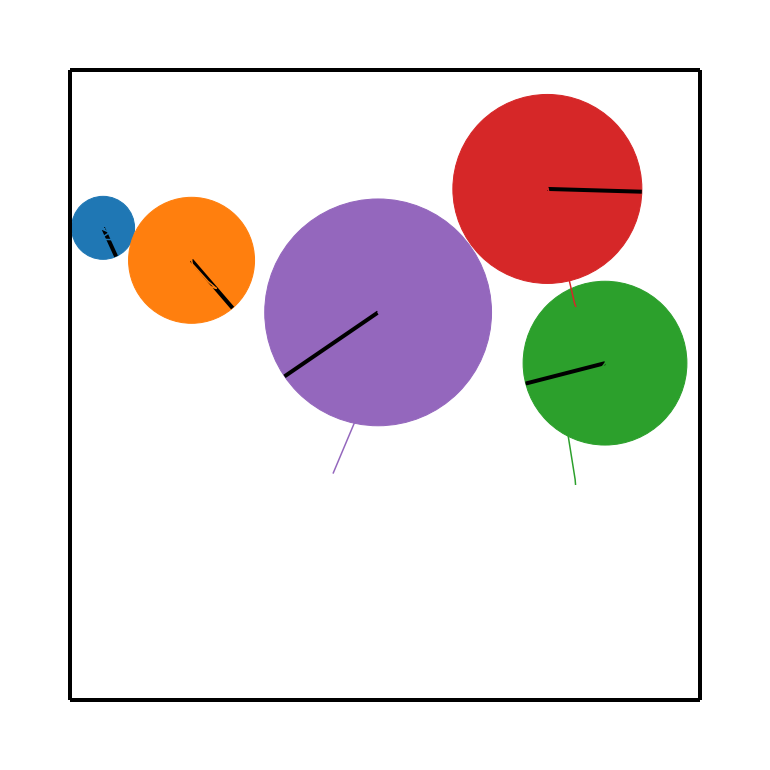

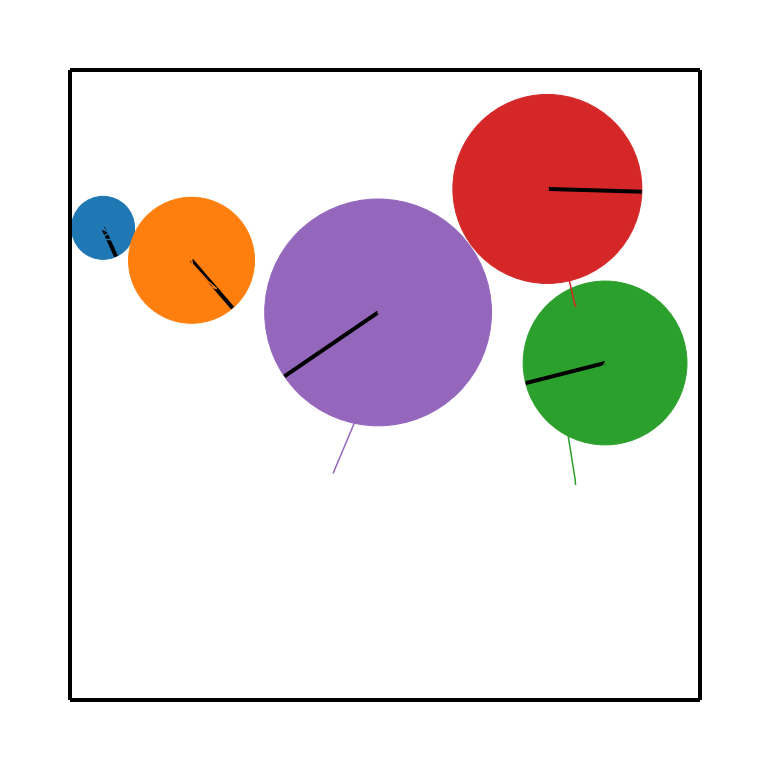

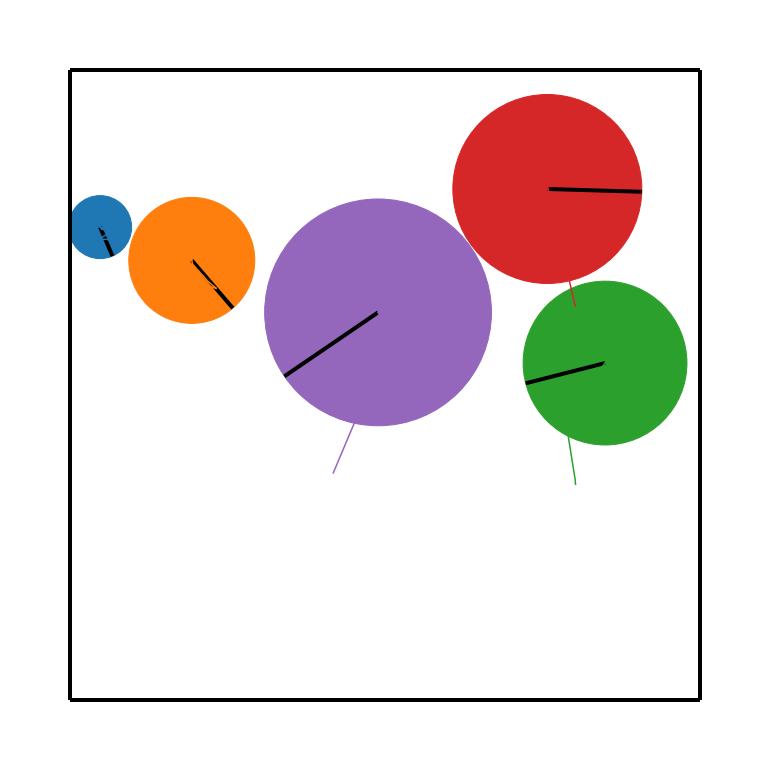

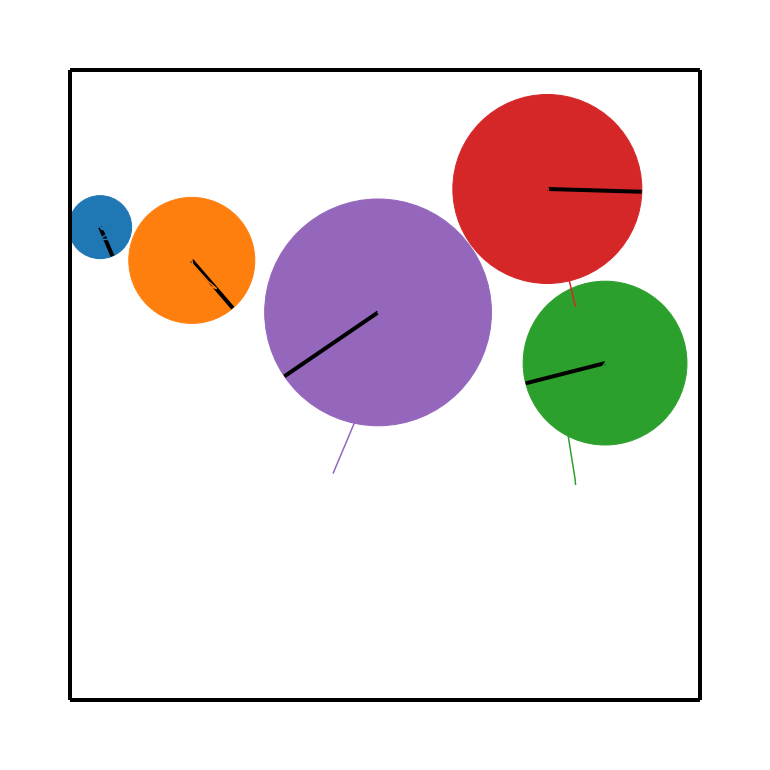

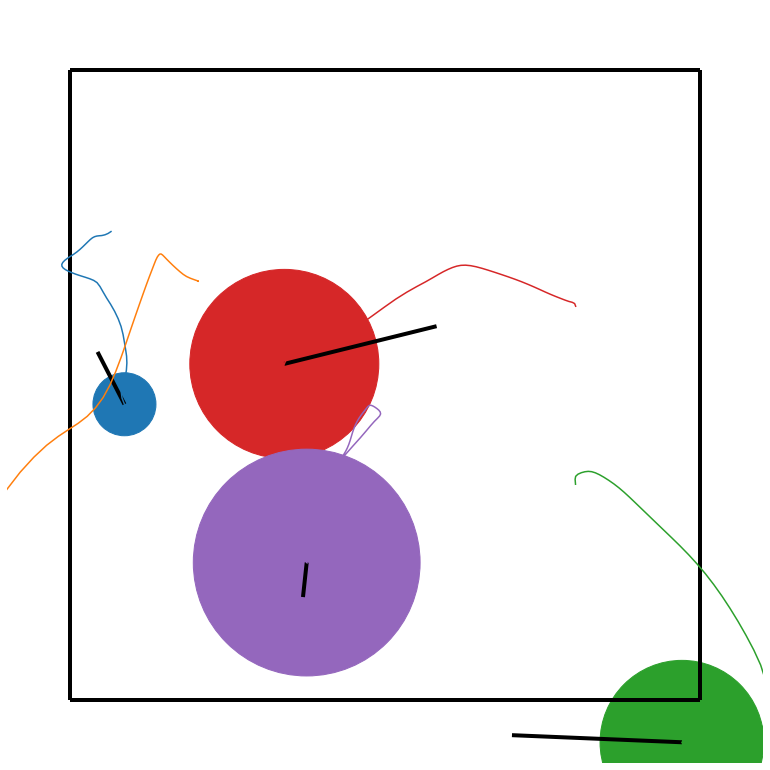

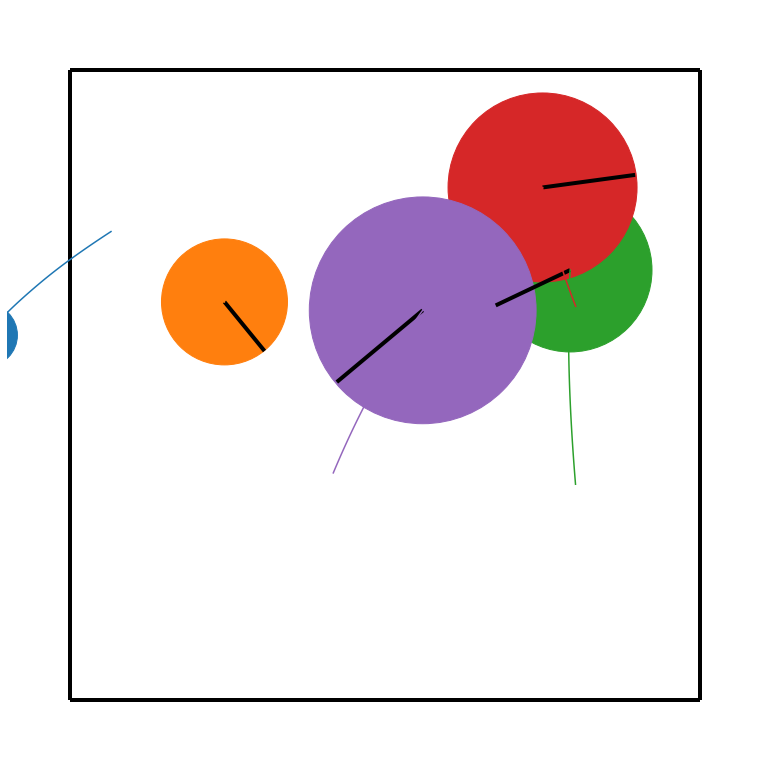

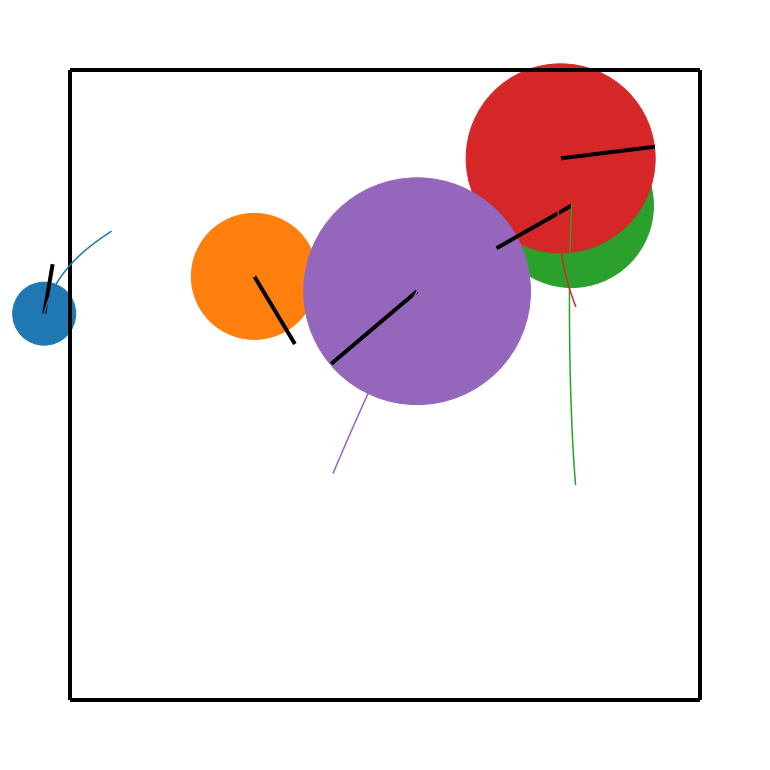

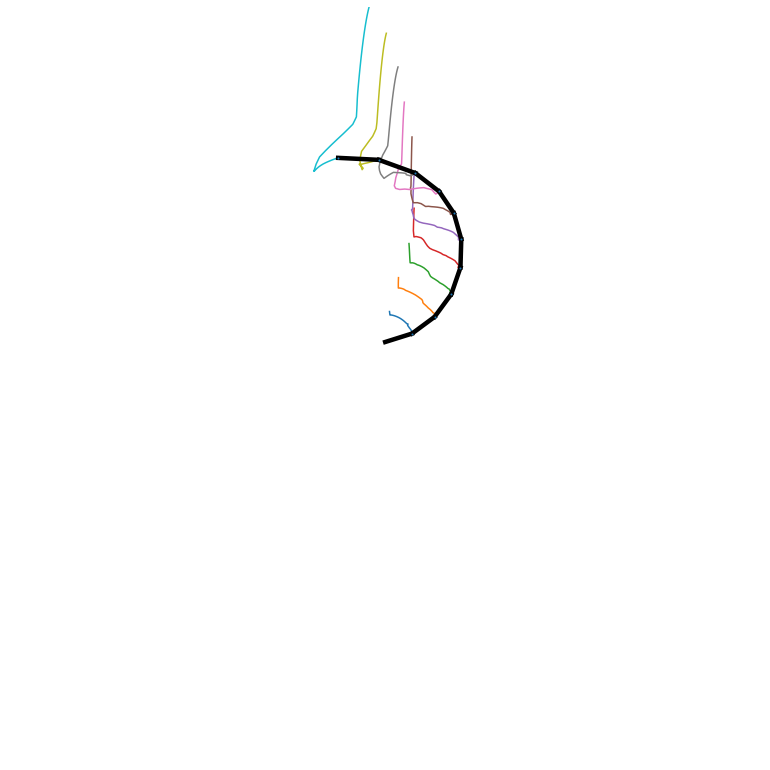

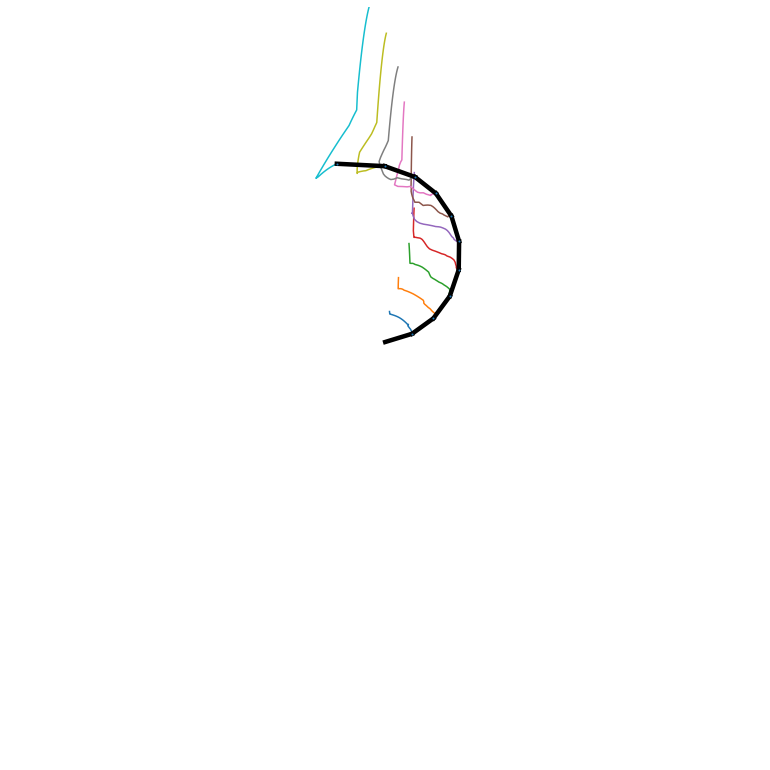

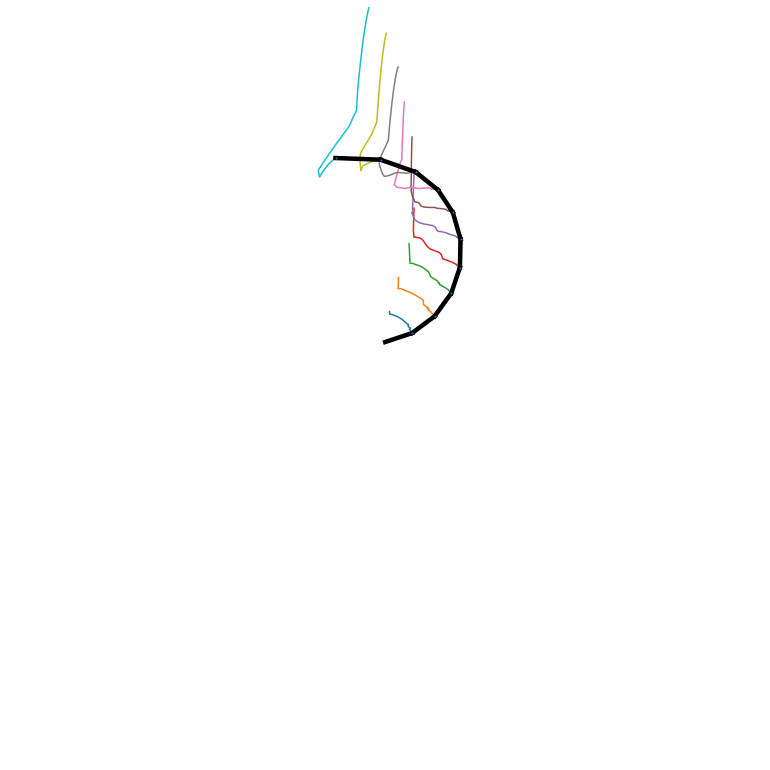

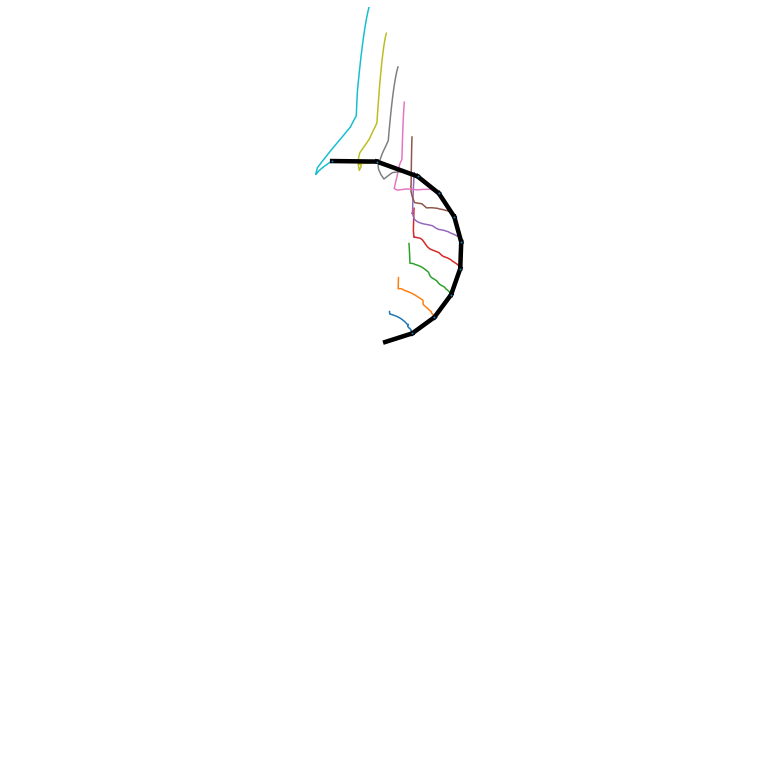

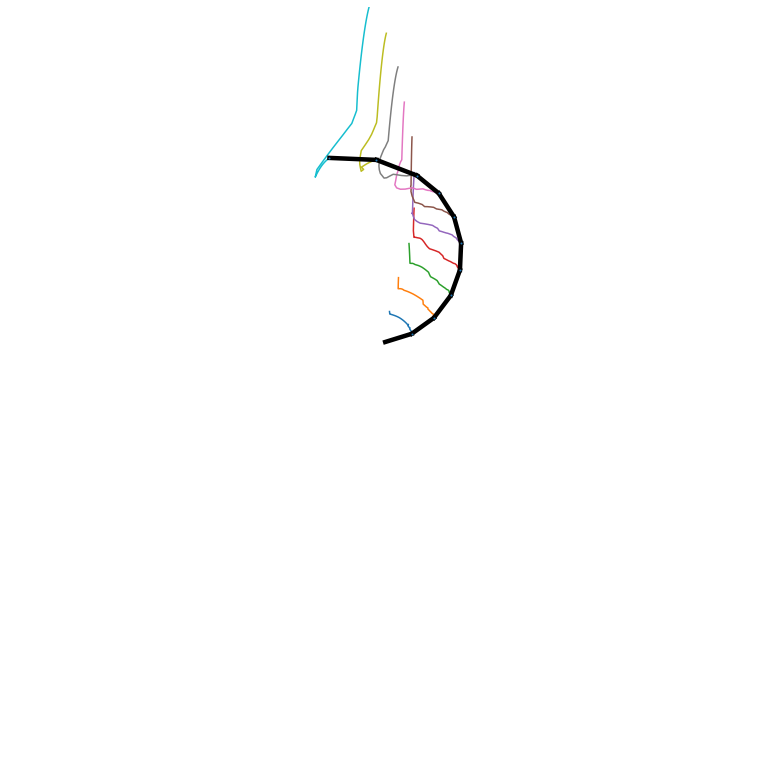

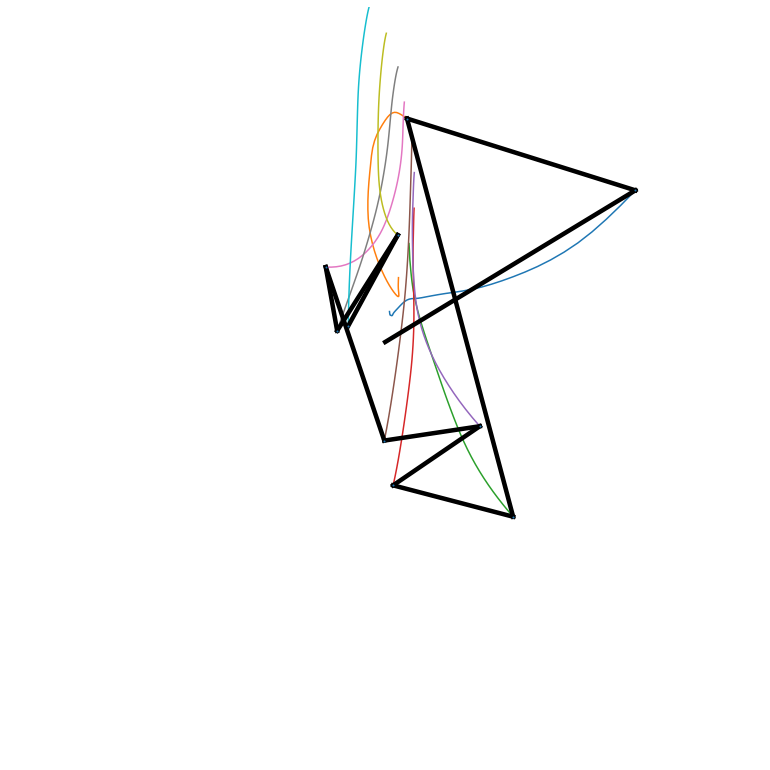

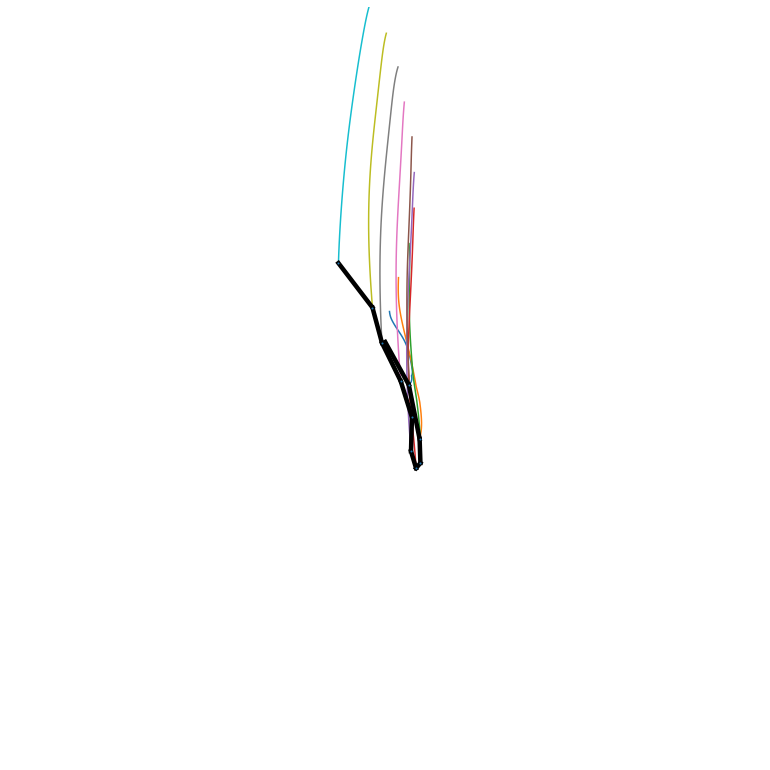

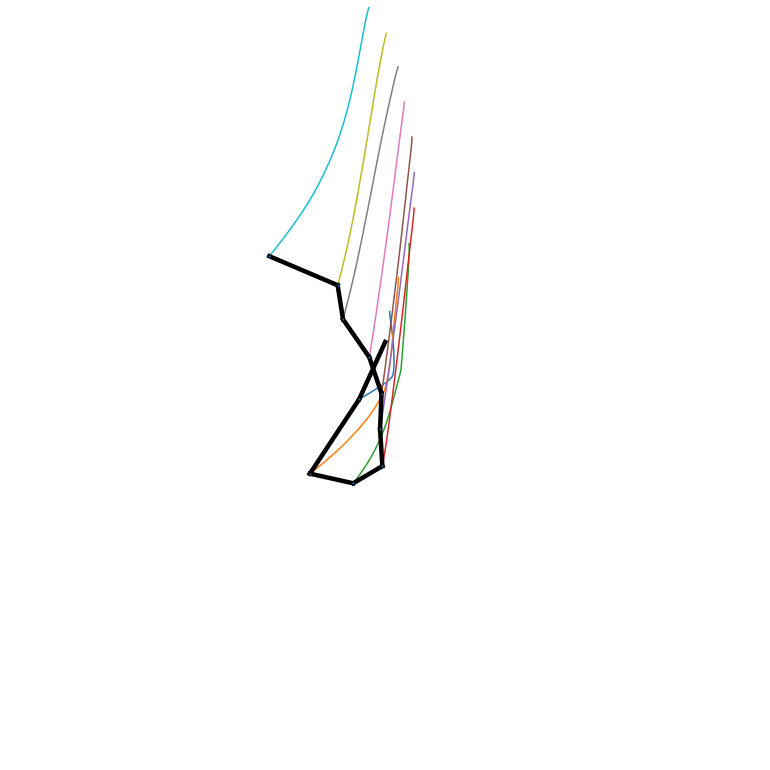

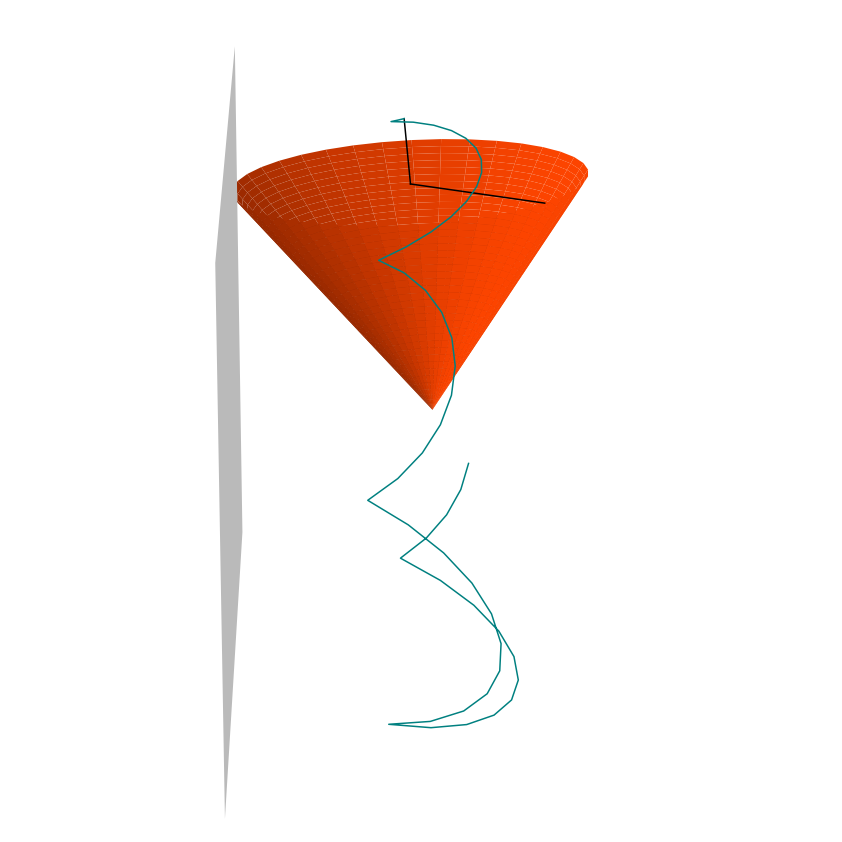

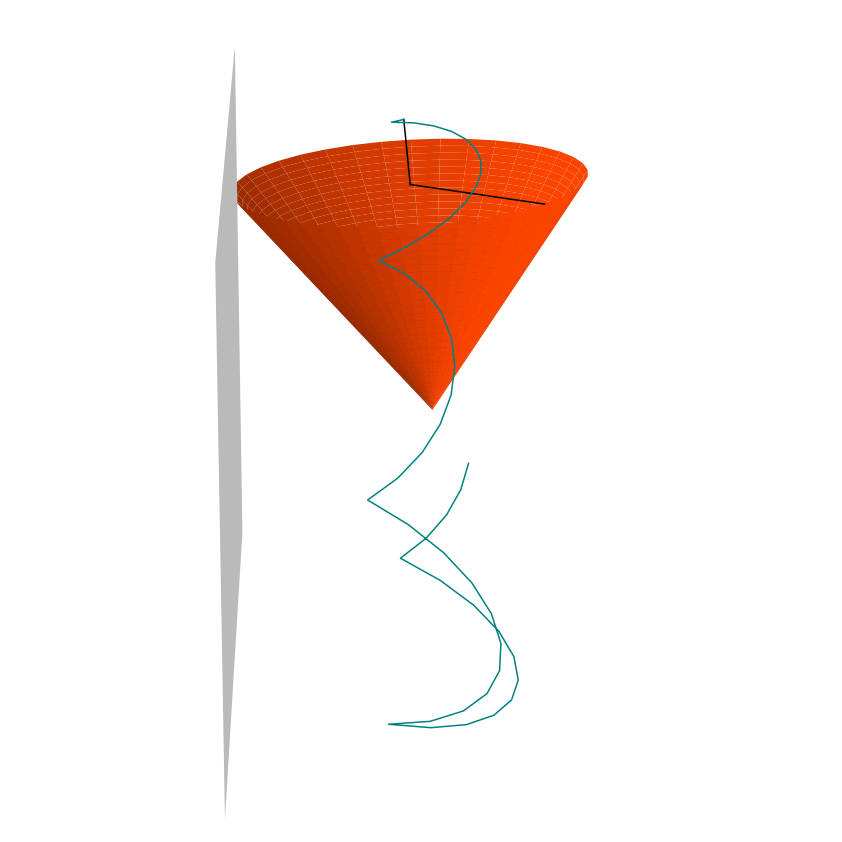

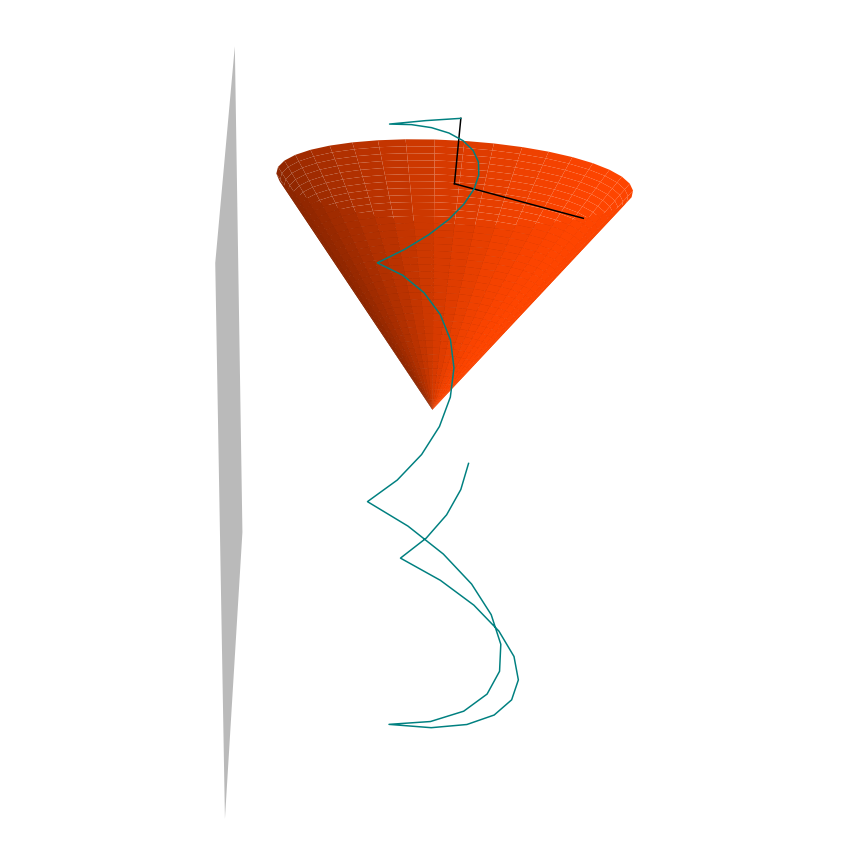

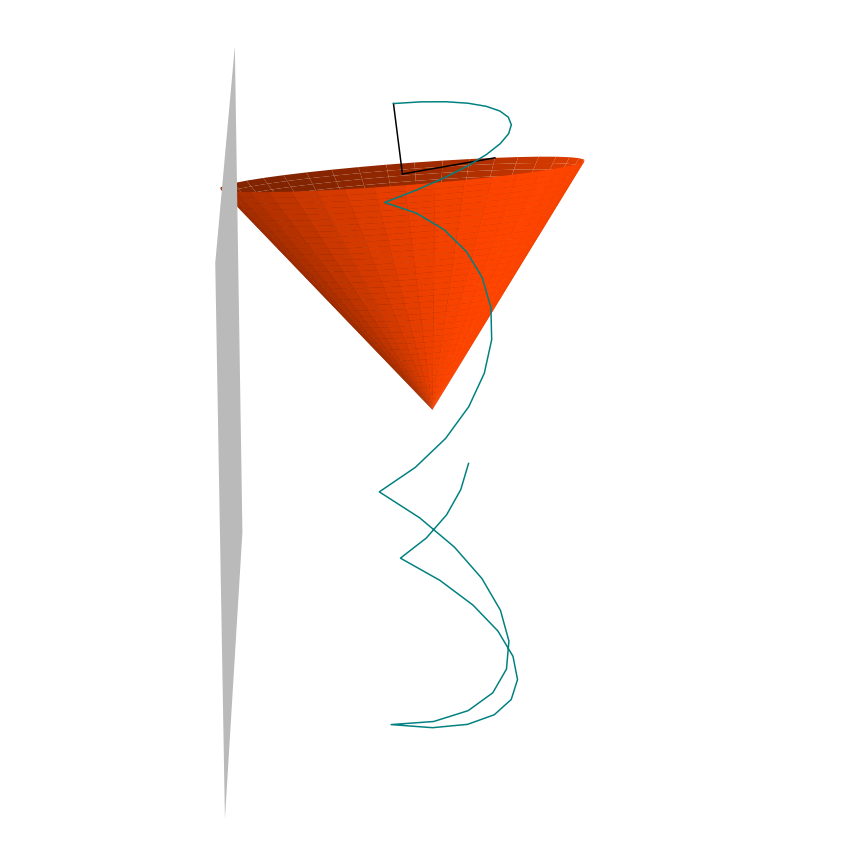

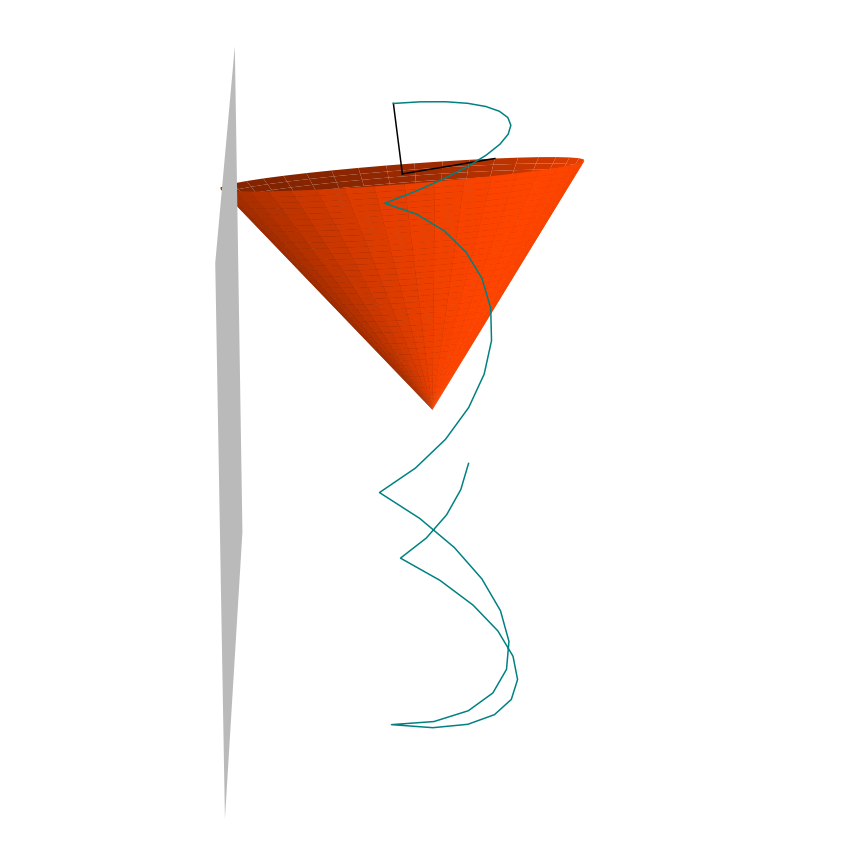

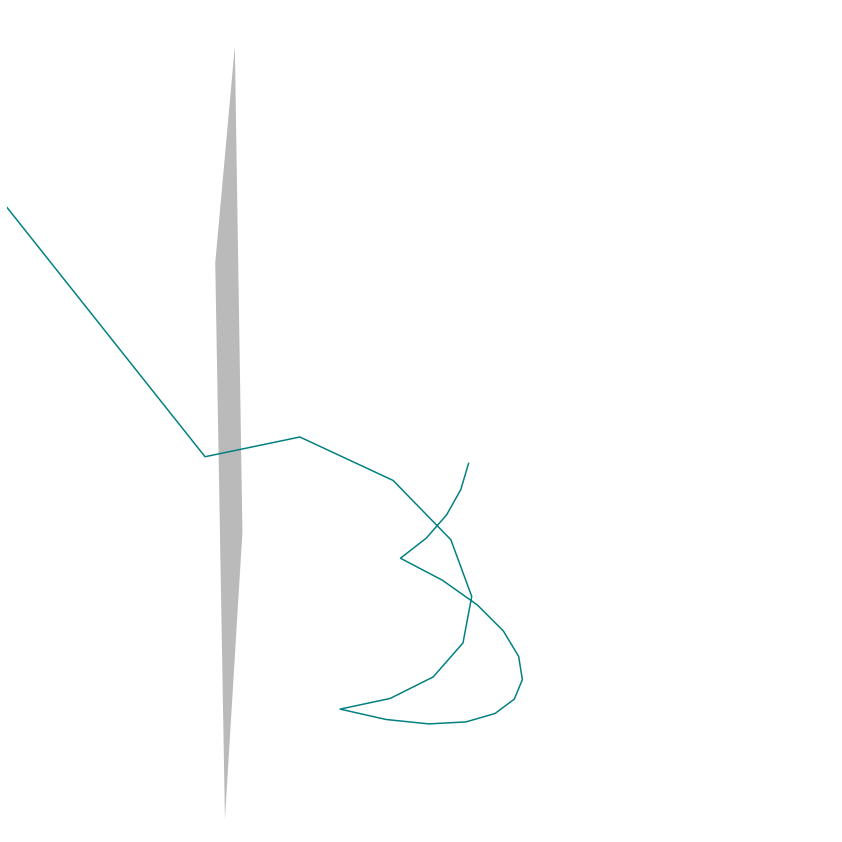

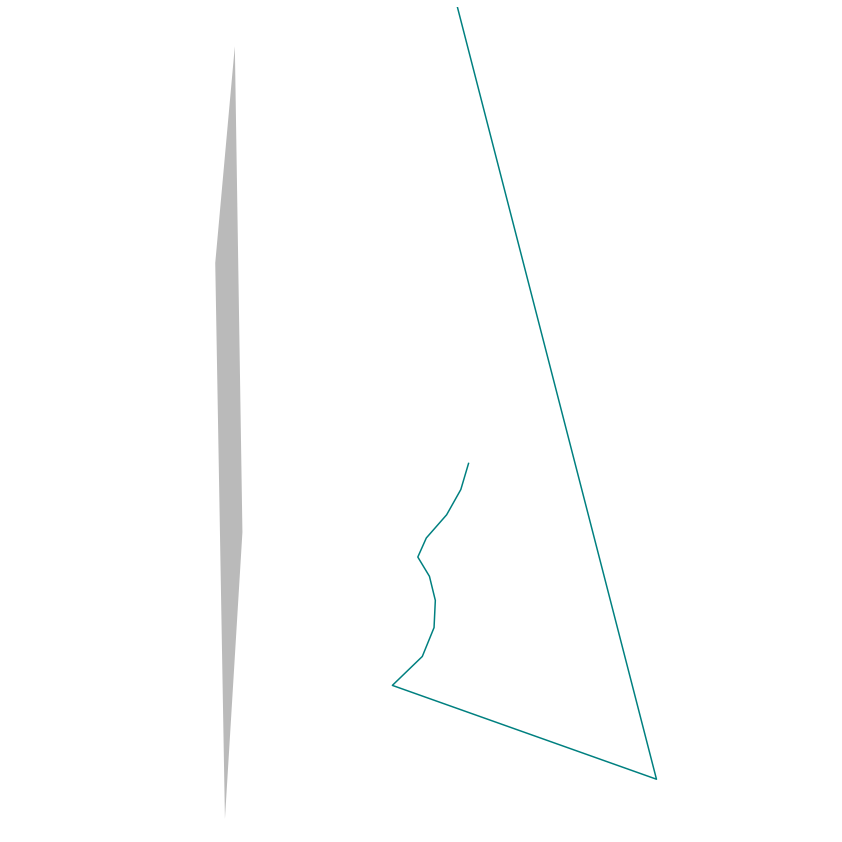

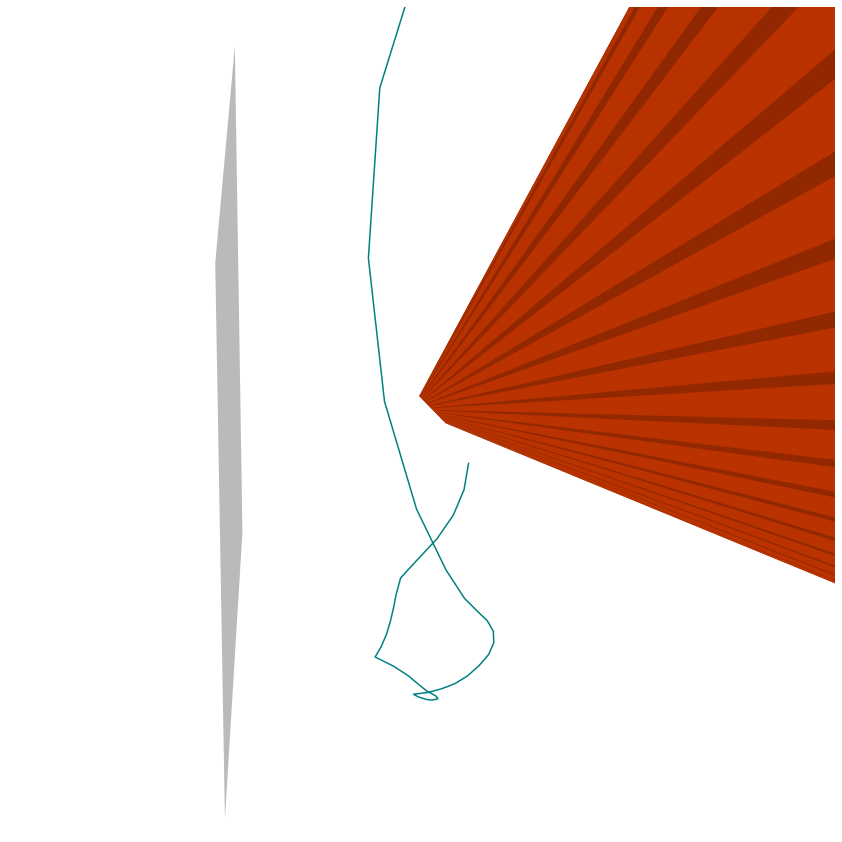

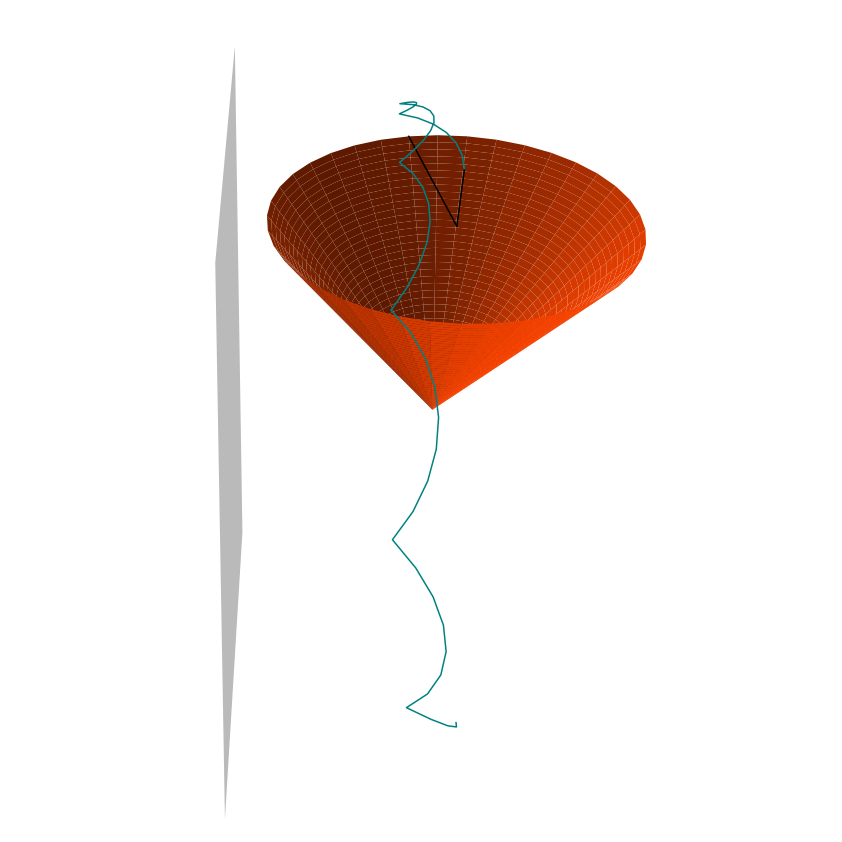

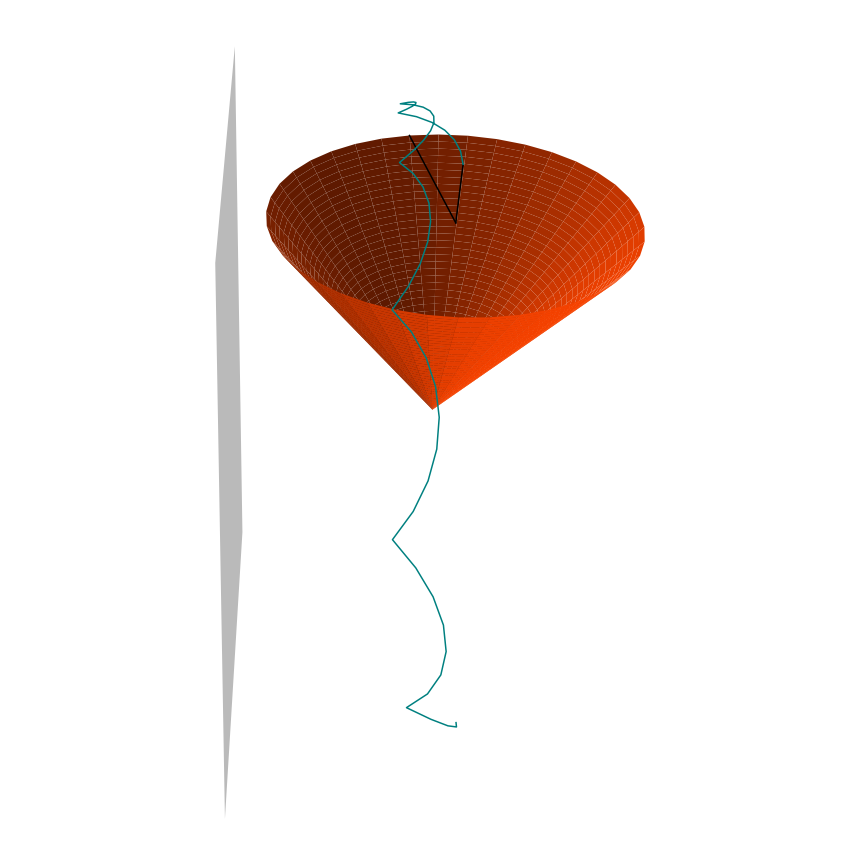

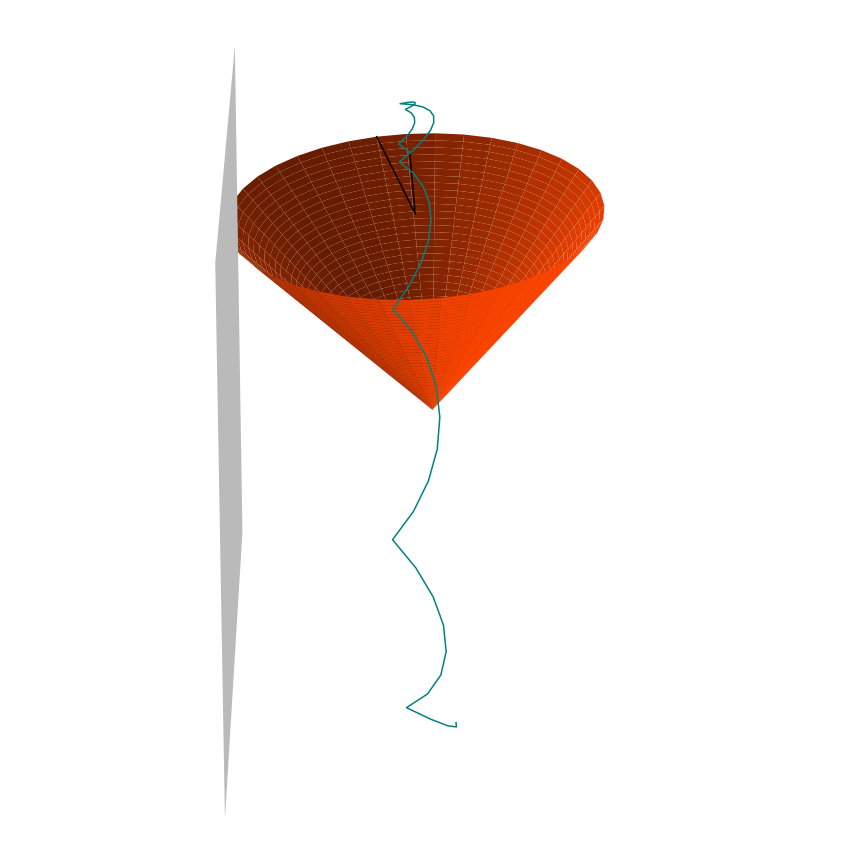

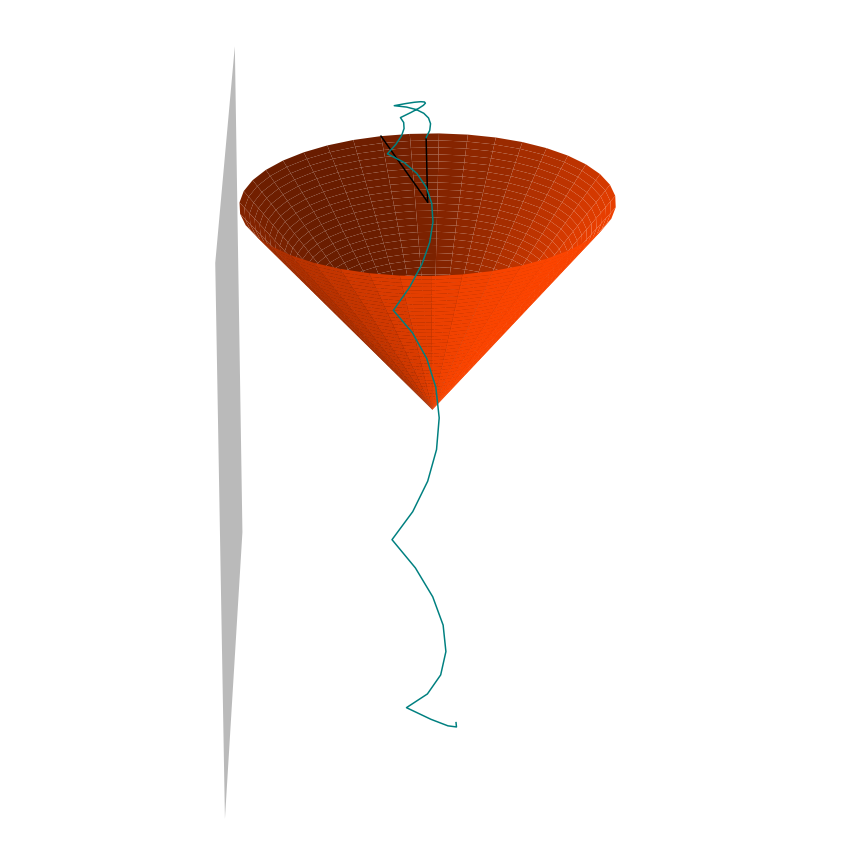

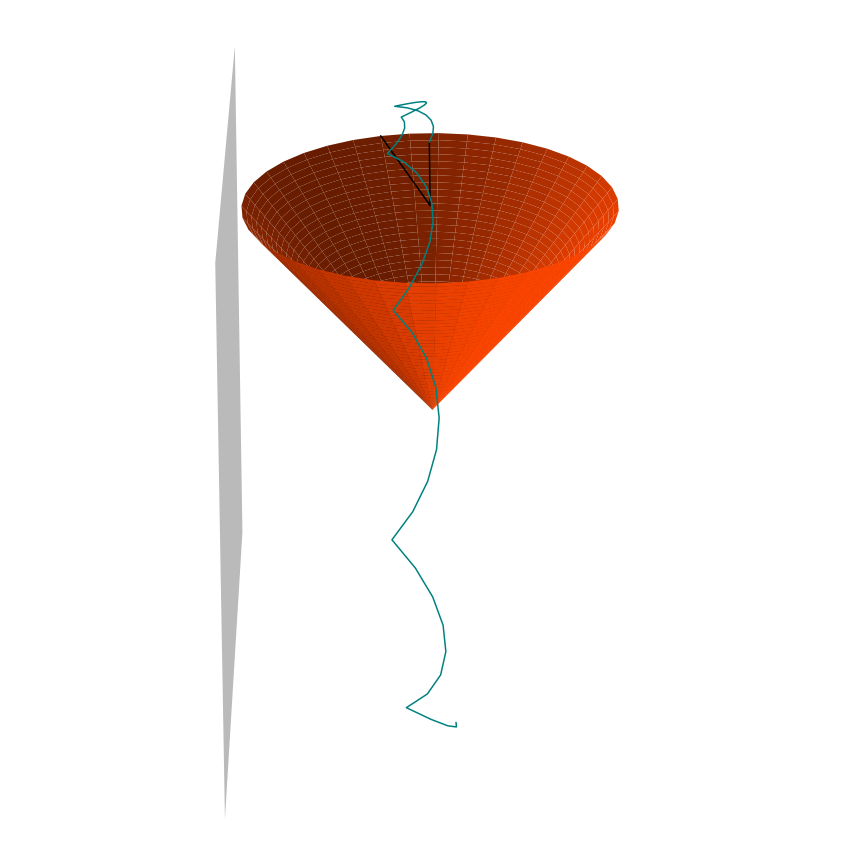

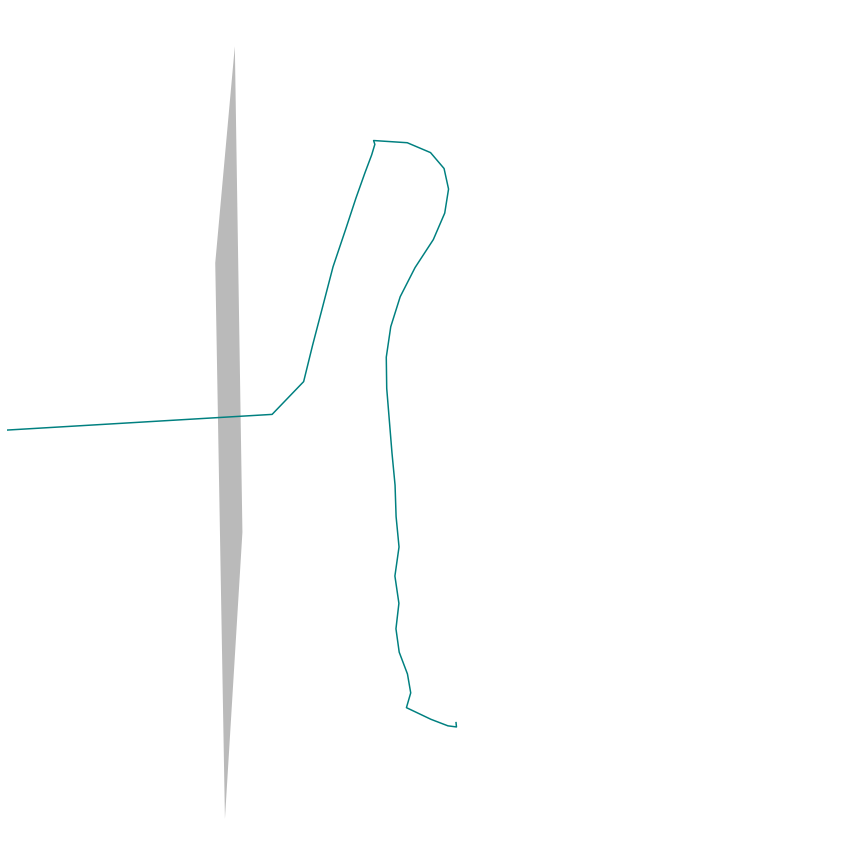

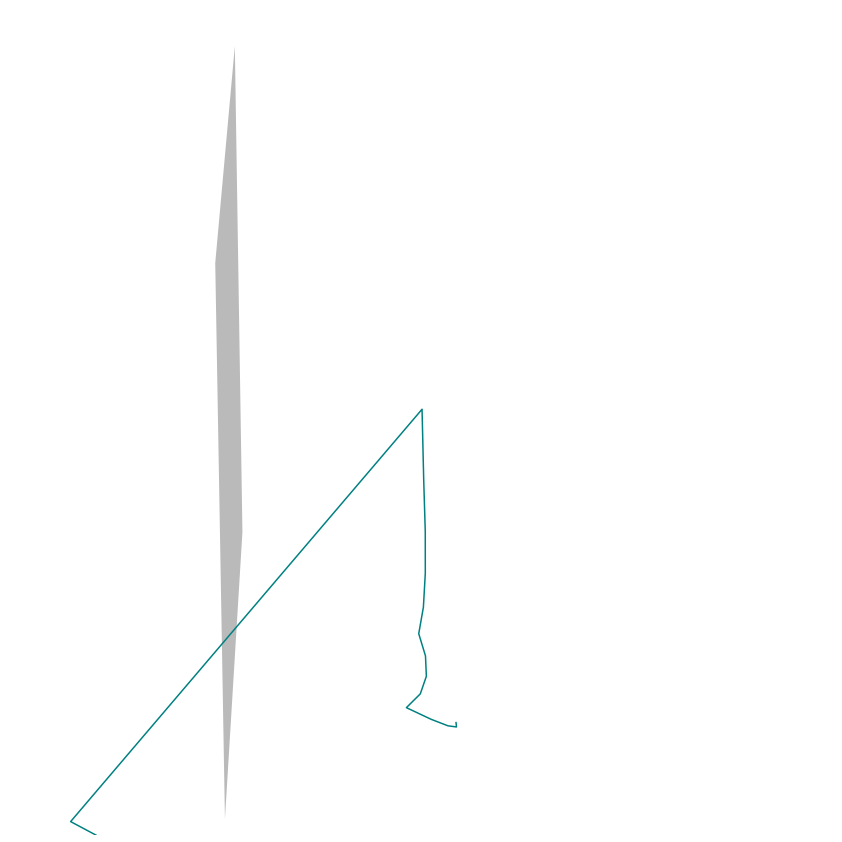

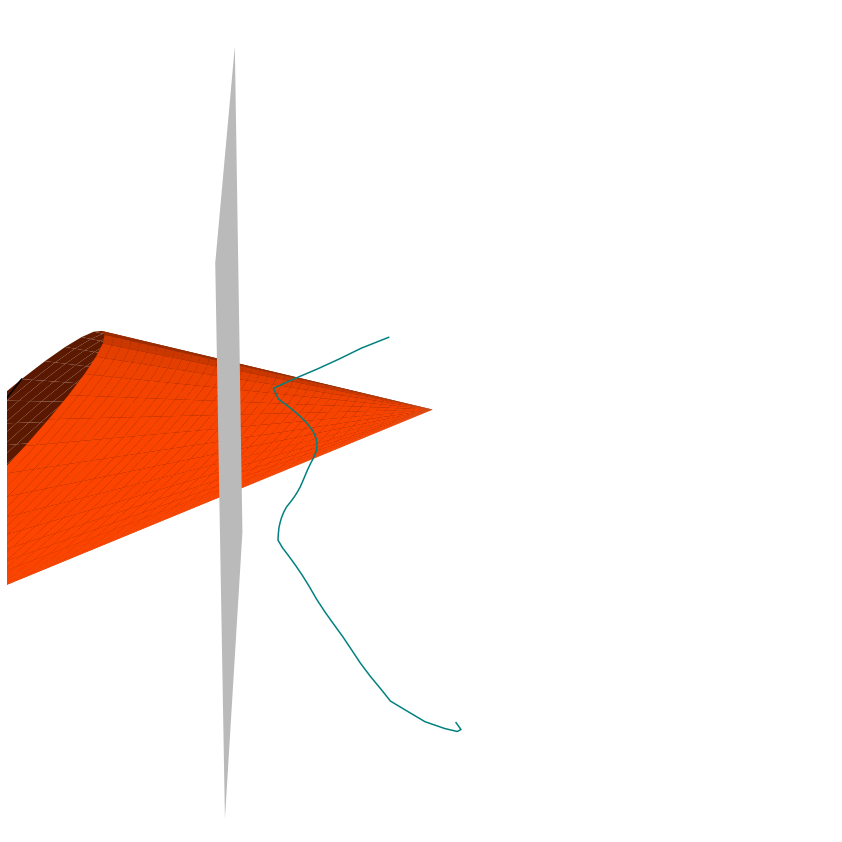

In [4]:
def save_gifs():
    for system_name in system_names:
        ani = bodies[system_name].animate(results[system_name][model_names[0]]['true_zts'][0])
        ani.save(os.path.join(FIG_DIR, f'{system_name}_true.gif'), writer='pillow')

        for idx, model_name in enumerate(model_names):
            ani = bodies[system_name].animate(results[system_name][model_name]['pred_zts'][0])
            ani.save(os.path.join(FIG_DIR, f'{system_name}_pred_{model_name}.gif'), writer='pillow')
save_gifs()